In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import torch
from pytorch_lightning import seed_everything
from torch_geometric.loader import DataLoader
from src.datasets.zinc_smiles_generation import ZincSmiles
from src.encoding.configs_and_constants import ZINC_SMILES_HRR_7744_CONFIG
from src.encoding.graph_encoders import HyperNet, load_or_create_hypernet
from src.utils.utils import GLOBAL_MODEL_PATH

"""
Features
    Atom types size: 9
    Atom types: ['Br', 'C', 'Cl', 'F', 'I', 'N', 'O', 'P', 'S']
    Degrees size: 5, encoded with 0 index:
    Degrees: {1, 2, 3, 4, 5}
    Formal Charges size: 3
    Formal Charges: {0, 1, -1}
    Explicit Hs size: 4
    Explicit Hs: {0, 1, 2, 3}
Encodings:
    float(ZINC_SMILE_ATOM_TO_IDX[atom.GetSymbol()]),
    float(atom.GetDegree() - 1),  # [1, 2, 3, 4, 5] -> [0, 1, 2, 3, 4]
    float(atom.GetFormalCharge() if atom.GetFormalCharge() >= 0 else 2),  # [0, 1, -1] -> [0, 1, 2]
    float(atom.GetTotalNumHs()),
"""

seed = 42

seed_everything(seed)
device = torch.device('cpu')
print("Loading/creating hypernet …")
hypernet: HyperNet = (
    load_or_create_hypernet(path=GLOBAL_MODEL_PATH, cfg=ZINC_SMILES_HRR_7744_CONFIG).to(device=device)
)
print("Hypernet ready.")
assert not hypernet.use_edge_features()
assert not hypernet.use_graph_features()

Seed set to 42


Loading/creating hypernet …
Loading existing HyperNet from /Users/akaveh/projects/kit/graph_hdc/_models/hypernet_ZincSmilesHRR7744_HRR_dim7744_s42_depth3_ecb0.pt
Hypernet ready.


Classifier's cfg
{   'batch_size': 256,
    'continue_from': None,
    'epochs': 15,
    'exclude_negs': [],
    'exp_dir_name': 'mlp_laynorm_deep',
    'hidden_dims': [   2048,
                       2048,
                       2048,
                       2048,
                       2048,
                       2048,
                       2048,
                       2048,
                       1024,
                       512,
                       128],
    'hv_dim': 7744,
    'hv_scale': None,
    'keep_last_k': 2,
    'lr': 0.0001,
    'micro_bs': 64,
    'n_per_parent': 20,
    'num_workers': 0,
    'oracle_beam_size': 32,
    'oracle_num_evals': 32,
    'p_per_parent': 20,
    'pin_memory': False,
    'prefetch_factor': 1,
    'project_dir': PosixPath('/home/hk-project-aimat2/zi9629/graph_hdc'),
    'resample_training_data_on_batch': True,
    'resume_retrain_last_epoch': False,
    'save_every_seconds': 70000,
    'seed': 42,
    'stratify': True,
    'train_parents_end':

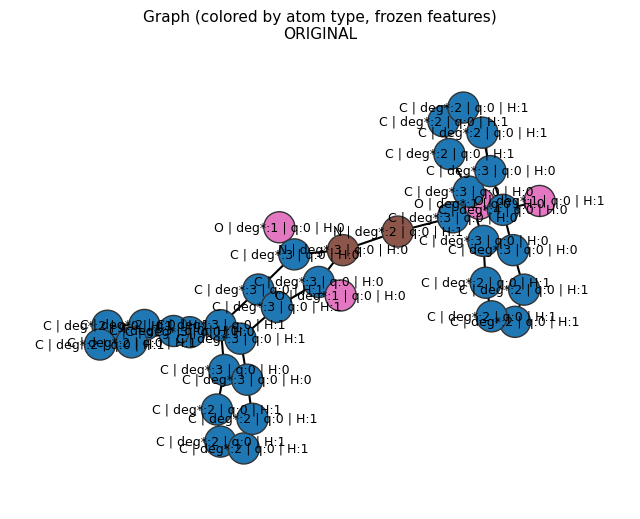

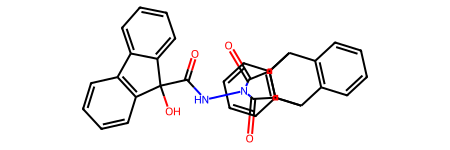

Num Nodes 38
Num Edges 45
Multiset Nodes 38
Decoding a graph with 38 nodes and 45 edges.
[population@iter0] Acc 66.67 at size 30
[population@iter2] Acc: 58.33% at size 12
[population@iter3] Acc: 55.56% at size 81
[population@iter4] Acc: 41.56% at size 77
[population@iter5] Acc: 22.50% at size 80
[population@iter6] Acc: 54.43% at size 79
[population@iter7] Acc: 50.59% at size 85
[population@iter8] Acc: 41.18% at size 68
[population@iter9] Acc: 42.31% at size 52
[population@iter10] Acc: 62.67% at size 75
[population@iter11] Acc: 63.22% at size 87
[population@iter12] Acc: 57.30% at size 89
[population@iter13] Acc: 65.75% at size 73
[population@iter14] Acc: 84.09% at size 132
[population@iter15] Acc: 77.84% at size 176
[population@iter16] Acc: 81.60% at size 212
[population@iter17] Acc: 77.66% at size 291
[population@iter18] Acc: 79.41% at size 136
[population@iter19] Acc: 62.35% at size 85
[population@iter20] Acc: 58.54% at size 82
[population@iter21] Acc: 52.05% at size 73
[population@it

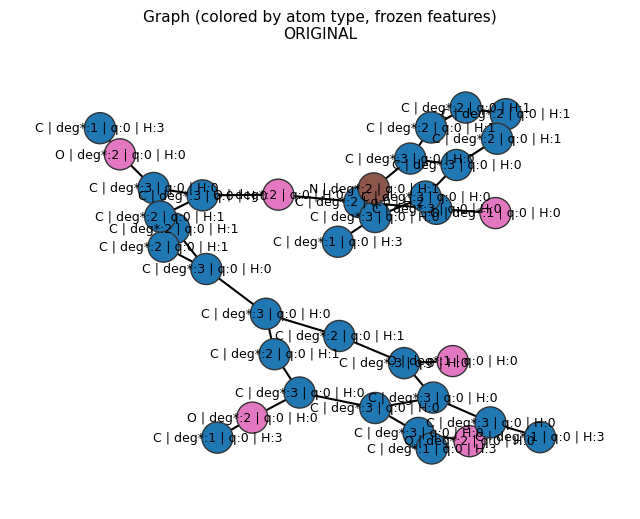

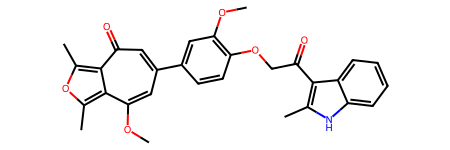

Num Nodes 37
Num Edges 41
Multiset Nodes 37
Decoding a graph with 37 nodes and 41 edges.
[population@iter0] Acc 43.48 at size 23
[population@iter2] Acc: 26.89% at size 119
[population@iter3] Acc: 13.89% at size 36
[population@iter4] Acc: 8.33% at size 36
[population@iter5] Acc: 21.05% at size 38
[population@iter6] Acc: 10.26% at size 39
[population@iter7] Acc: 14.71% at size 34
[population@iter8] Acc: 14.63% at size 41
[population@iter9] Acc: 30.61% at size 49
[population@iter10] Acc: 35.29% at size 34
[population@iter11] Acc: 47.06% at size 51
[population@iter12] Acc: 69.35% at size 62
[population@iter13] Acc: 56.00% at size 50
[population@iter14] Acc: 43.90% at size 82
[population@iter15] Acc: 40.30% at size 67
[population@iter16] Acc: 35.29% at size 85
[population@iter17] Acc: 47.62% at size 84
[population@iter18] Acc: 59.52% at size 84
[population@iter19] Acc: 38.27% at size 81
[population@iter20] Acc: 51.56% at size 64
[population@iter21] Acc: 40.43% at size 94
[population@iter22]

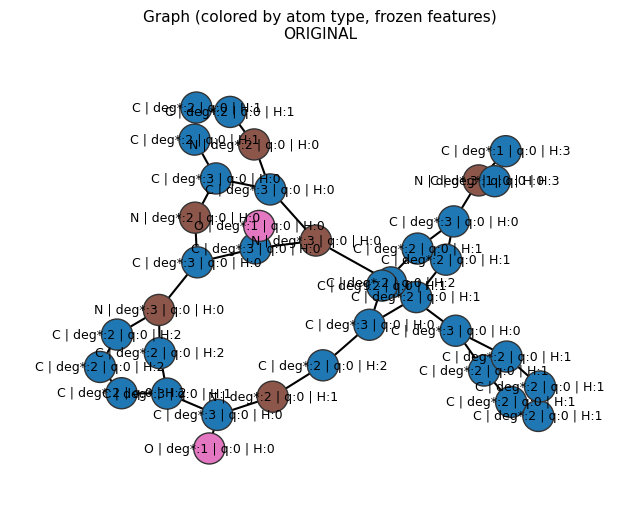

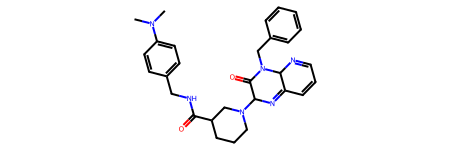

Num Nodes 37
Num Edges 41
Multiset Nodes 37
Decoding a graph with 37 nodes and 41 edges.
[population@iter0] Acc 75.00 at size 40
[population@iter2] Acc: 60.87% at size 161
[population@iter3] Acc: 37.10% at size 62
[population@iter4] Acc: 34.48% at size 58
[population@iter5] Acc: 37.29% at size 59
[population@iter6] Acc: 20.69% at size 58
[population@iter7] Acc: 35.00% at size 60
[population@iter8] Acc: 44.26% at size 61
[population@iter9] Acc: 11.54% at size 52
[population@iter10] Acc: 28.00% at size 50
[population@iter11] Acc: 44.44% at size 54
[population@iter12] Acc: 53.09% at size 81
[population@iter13] Acc: 55.38% at size 65
[population@iter14] Acc: 53.62% at size 69
[population@iter15] Acc: 73.13% at size 67
[population@iter16] Acc: 74.36% at size 117
[population@iter17] Acc: 68.49% at size 73
[population@iter18] Acc: 88.07% at size 109
[population@iter19] Acc: 85.31% at size 177
[population@iter20] Acc: 89.13% at size 138
[population@iter21] Acc: 85.71% at size 140
[population@i

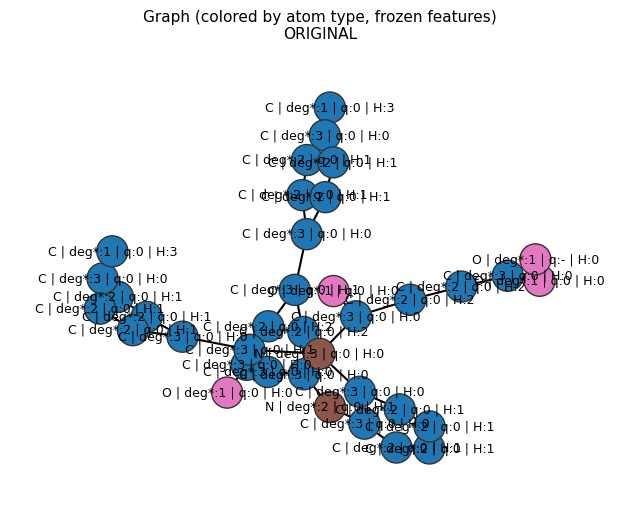

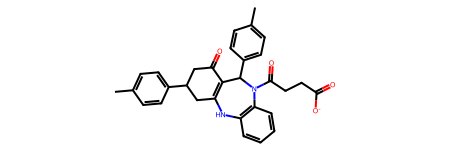

Num Nodes 37
Num Edges 41
Multiset Nodes 37
Decoding a graph with 37 nodes and 41 edges.
[population@iter0] Acc 64.86 at size 37
[population@iter2] Acc: 63.46% at size 52
[population@iter3] Acc: 42.02% at size 119
[population@iter4] Acc: 43.33% at size 90
[population@iter5] Acc: 31.37% at size 51
[population@iter6] Acc: 20.41% at size 49
[population@iter7] Acc: 25.00% at size 48
[population@iter8] Acc: 69.70% at size 66
[population@iter9] Acc: 55.41% at size 74
[population@iter10] Acc: 45.71% at size 70
[population@iter11] Acc: 61.80% at size 89
[population@iter12] Acc: 68.25% at size 126
[population@iter13] Acc: 61.02% at size 118
[population@iter14] Acc: 80.15% at size 131
[population@iter15] Acc: 80.85% at size 141
[population@iter16] Acc: 84.29% at size 140
[population@iter17] Acc: 83.02% at size 106
[population@iter18] Acc: 80.92% at size 131
[population@iter19] Acc: 84.40% at size 141
[population@iter20] Acc: 84.03% at size 144
[population@iter21] Acc: 93.38% at size 151
[populat

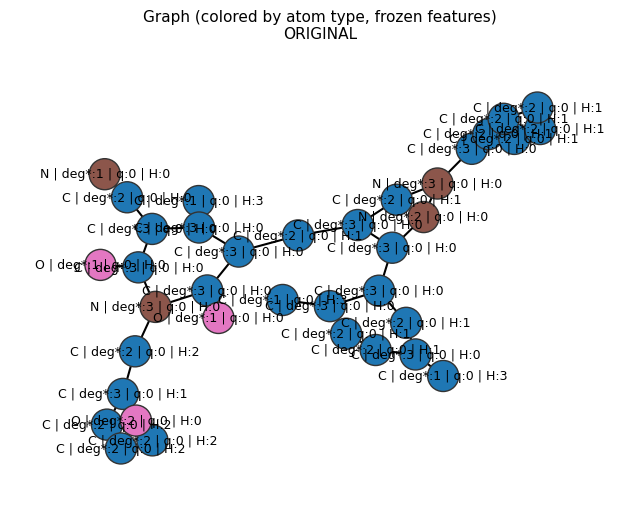

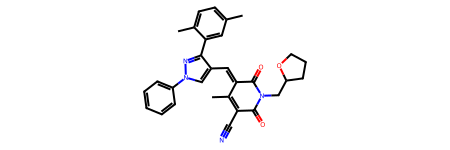

Num Nodes 37
Num Edges 41
Multiset Nodes 37
Decoding a graph with 37 nodes and 41 edges.
[population@iter0] Acc 48.21 at size 56
[population@iter2] Acc: 47.18% at size 443
[population@iter3] Acc: 38.71% at size 62
[population@iter4] Acc: 20.31% at size 64
[population@iter5] Acc: 19.18% at size 73
[population@iter6] Acc: 13.33% at size 60
[population@iter7] Acc: 29.09% at size 55
[population@iter8] Acc: 19.05% at size 63
[population@iter9] Acc: 8.20% at size 61
[population@iter10] Acc: 1.82% at size 55
[population@iter11] Acc: 3.70% at size 54
[population@iter12] Acc: 41.82% at size 55
[population@iter13] Acc: 59.62% at size 52
[population@iter14] Acc: 72.41% at size 87
[population@iter15] Acc: 62.75% at size 51
[population@iter16] Acc: 64.58% at size 48
[population@iter17] Acc: 84.62% at size 52
[population@iter18] Acc: 77.32% at size 97
[population@iter19] Acc: 89.87% at size 79
[population@iter20] Acc: 90.38% at size 52
[population@iter21] Acc: 56.00% at size 50
[population@iter22] A

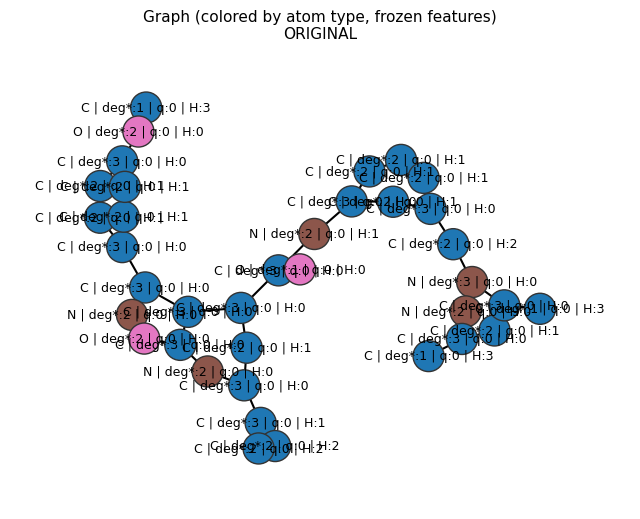

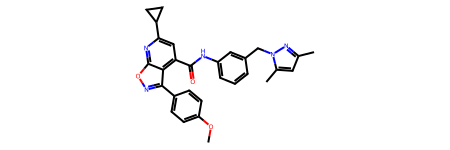

Num Nodes 37
Num Edges 42
Multiset Nodes 37
Decoding a graph with 37 nodes and 42 edges.
[population@iter0] Acc 36.73 at size 49
[population@iter2] Acc: 31.88% at size 436
[population@iter3] Acc: 39.06% at size 64
[population@iter4] Acc: 25.37% at size 67
[population@iter5] Acc: 16.42% at size 67
[population@iter6] Acc: 29.85% at size 67
[population@iter7] Acc: 57.89% at size 76
[population@iter8] Acc: 32.79% at size 61
[population@iter9] Acc: 69.23% at size 91
[population@iter10] Acc: 62.07% at size 87
[population@iter11] Acc: 64.18% at size 67
[population@iter12] Acc: 38.64% at size 44
[population@iter13] Acc: 50.00% at size 46
[population@iter14] Acc: 48.78% at size 41
[population@iter15] Acc: 58.14% at size 43
[population@iter16] Acc: 67.44% at size 43
[population@iter17] Acc: 70.83% at size 48
[population@iter18] Acc: 70.45% at size 44
[population@iter19] Acc: 80.00% at size 50
[population@iter20] Acc: 60.00% at size 30
[population@iter21] Acc: 86.36% at size 44
[population@iter22

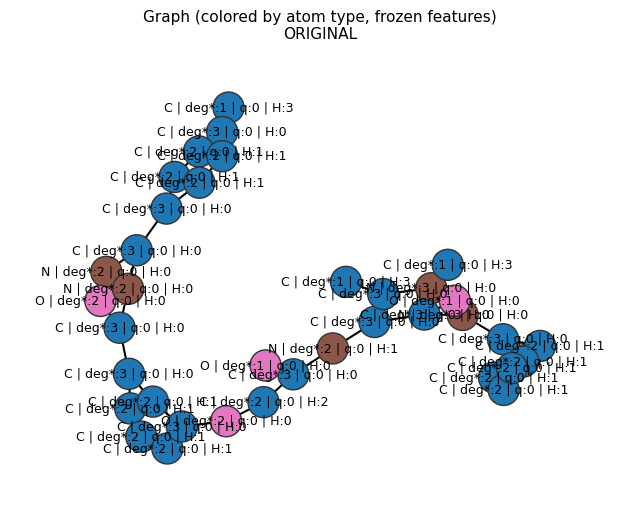

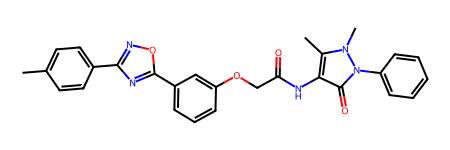

Num Nodes 37
Num Edges 41
Multiset Nodes 37
Decoding a graph with 37 nodes and 41 edges.
[population@iter0] Acc 70.00 at size 40
[population@iter2] Acc: 66.00% at size 50
[population@iter3] Acc: 39.13% at size 92
[population@iter4] Acc: 46.43% at size 84
[population@iter5] Acc: 22.73% at size 88
[population@iter6] Acc: 18.00% at size 50
[population@iter7] Acc: 24.49% at size 49
[population@iter8] Acc: 44.90% at size 49
[population@iter9] Acc: 52.38% at size 84
[population@iter10] Acc: 61.76% at size 102
[population@iter11] Acc: 25.58% at size 86
[population@iter12] Acc: 6.67% at size 45
[population@iter13] Acc: 0.00% at size 44
[population@iter14] Acc: 13.95% at size 43
[population@iter15] Acc: 23.08% at size 39
[population@iter16] Acc: 27.03% at size 37
[population@iter17] Acc: 42.50% at size 40
[population@iter18] Acc: 53.49% at size 43
[population@iter19] Acc: 57.89% at size 38
[population@iter20] Acc: 71.74% at size 46
[population@iter21] Acc: 65.22% at size 46
[population@iter22] 

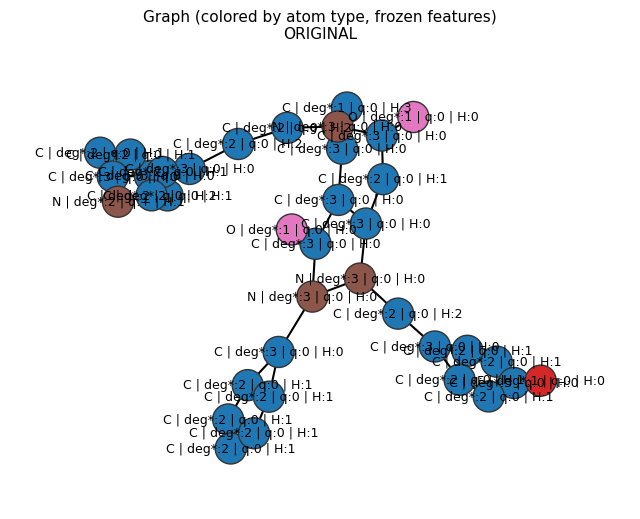

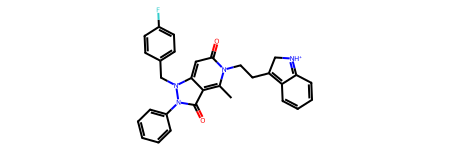

Num Nodes 37
Num Edges 42
Multiset Nodes 37
Decoding a graph with 37 nodes and 42 edges.
[population@iter0] Acc 55.17 at size 29
[population@iter2] Acc: 47.27% at size 165
[population@iter3] Acc: 20.93% at size 43
[population@iter4] Acc: 15.91% at size 44
[population@iter5] Acc: 13.46% at size 52
[population@iter6] Acc: 20.00% at size 55
[population@iter7] Acc: 15.38% at size 39
[population@iter8] Acc: 32.50% at size 40
[population@iter9] Acc: 43.33% at size 60
[population@iter10] Acc: 45.95% at size 37
[population@iter11] Acc: 61.76% at size 68
[population@iter12] Acc: 63.41% at size 82
[population@iter13] Acc: 48.33% at size 60
[population@iter14] Acc: 34.04% at size 47
[population@iter15] Acc: 33.33% at size 45
[population@iter16] Acc: 34.88% at size 43
[population@iter17] Acc: 53.85% at size 39
[population@iter18] Acc: 62.07% at size 58
[population@iter19] Acc: 45.00% at size 40
[population@iter20] Acc: 50.00% at size 40
[population@iter21] Acc: 69.39% at size 49
[population@iter22

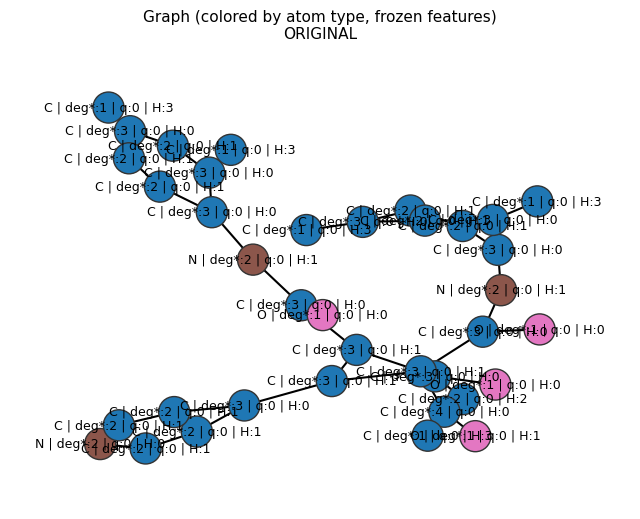

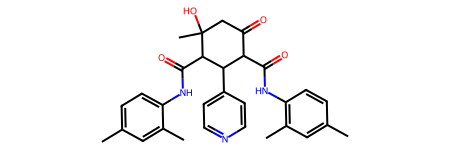

Num Nodes 37
Num Edges 40
Multiset Nodes 37
Decoding a graph with 37 nodes and 40 edges.
[population@iter0] Acc 71.74 at size 46
[population@iter2] Acc: 92.31% at size 13
[population@iter3] Acc: 77.27% at size 66
[population@iter4] Acc: 72.39% at size 163
[population@iter5] Acc: 92.00% at size 175
[population@iter6] Acc: 84.62% at size 78
[population@iter7] Acc: 46.51% at size 86
[population@iter8] Acc: 52.25% at size 111
[population@iter9] Acc: 20.25% at size 79
[population@iter10] Acc: 40.91% at size 44
[population@iter11] Acc: 25.53% at size 47
[population@iter12] Acc: 15.91% at size 44
[population@iter13] Acc: 58.21% at size 67
[population@iter14] Acc: 22.73% at size 44
[population@iter15] Acc: 55.56% at size 45
[population@iter16] Acc: 65.00% at size 40
[population@iter17] Acc: 91.23% at size 57
[population@iter18] Acc: 92.73% at size 55
[population@iter19] Acc: 94.52% at size 73
[population@iter20] Acc: 96.30% at size 54
[population@iter21] Acc: 93.94% at size 33
[population@iter

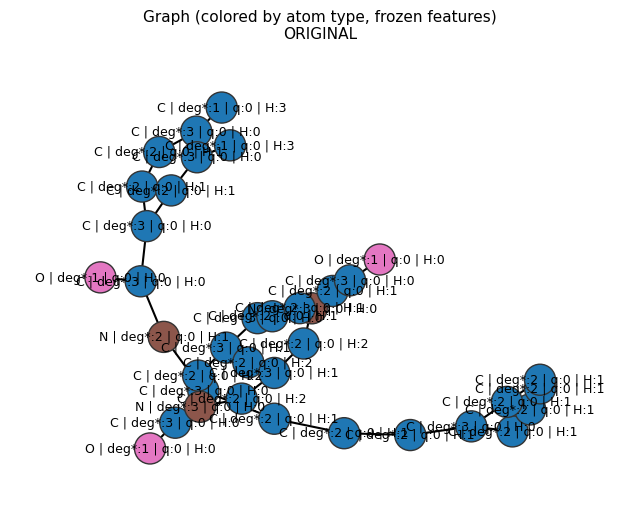

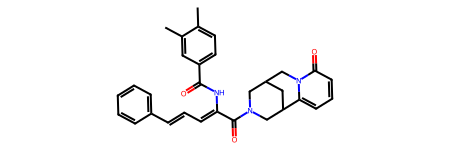

Num Nodes 37
Num Edges 41
Multiset Nodes 37
Decoding a graph with 37 nodes and 41 edges.
[population@iter0] Acc 68.75 at size 32
[population@iter2] Acc: 54.17% at size 48
[population@iter3] Acc: 46.88% at size 96
[population@iter4] Acc: 26.98% at size 63
[population@iter5] Acc: 14.55% at size 55
[population@iter6] Acc: 59.74% at size 77
[population@iter7] Acc: 33.33% at size 45
[population@iter8] Acc: 31.25% at size 48
[population@iter9] Acc: 67.50% at size 80
[population@iter10] Acc: 92.00% at size 100
[population@iter11] Acc: 88.67% at size 150
[population@iter12] Acc: 84.77% at size 197
[population@iter13] Acc: 89.17% at size 157
[population@iter14] Acc: 74.83% at size 147
[population@iter15] Acc: 61.54% at size 195
[population@iter16] Acc: 74.22% at size 128
[population@iter17] Acc: 69.85% at size 136
[population@iter18] Acc: 73.94% at size 142
[population@iter19] Acc: 74.60% at size 126
[population@iter20] Acc: 67.68% at size 99
[population@iter21] Acc: 43.82% at size 89
[populati

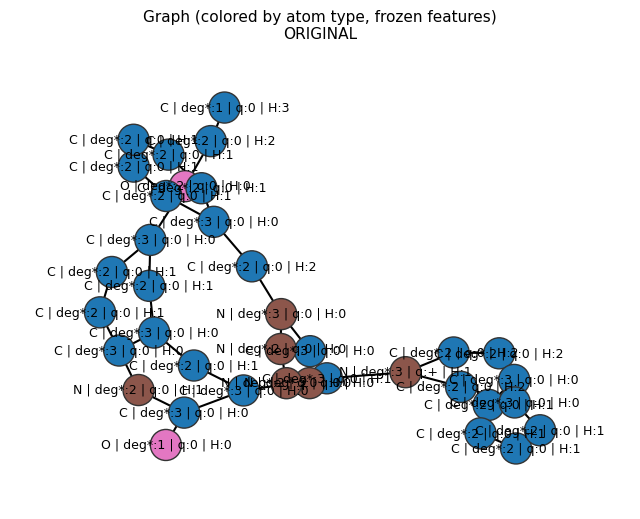

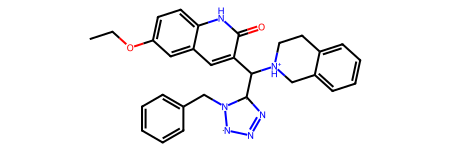

Num Nodes 37
Num Edges 42
Multiset Nodes 37
Decoding a graph with 37 nodes and 42 edges.
[population@iter0] Acc 67.24 at size 58
[population@iter2] Acc: 46.38% at size 69
[population@iter3] Acc: 49.25% at size 67
[population@iter4] Acc: 41.86% at size 86
[population@iter5] Acc: 29.27% at size 123
[population@iter6] Acc: 11.67% at size 60
[population@iter7] Acc: 50.00% at size 60
[population@iter8] Acc: 49.18% at size 61
[population@iter9] Acc: 52.87% at size 87
[population@iter10] Acc: 60.55% at size 109
[population@iter11] Acc: 68.88% at size 196
[population@iter12] Acc: 23.53% at size 85
[population@iter13] Acc: 10.64% at size 94
[population@iter14] Acc: 19.42% at size 103
[population@iter15] Acc: 25.96% at size 104
[population@iter16] Acc: 40.00% at size 95
[population@iter17] Acc: 64.29% at size 112
[population@iter18] Acc: 57.84% at size 102
[population@iter19] Acc: 66.18% at size 136
[population@iter20] Acc: 86.43% at size 199
[population@iter21] Acc: 85.65% at size 237
[populati

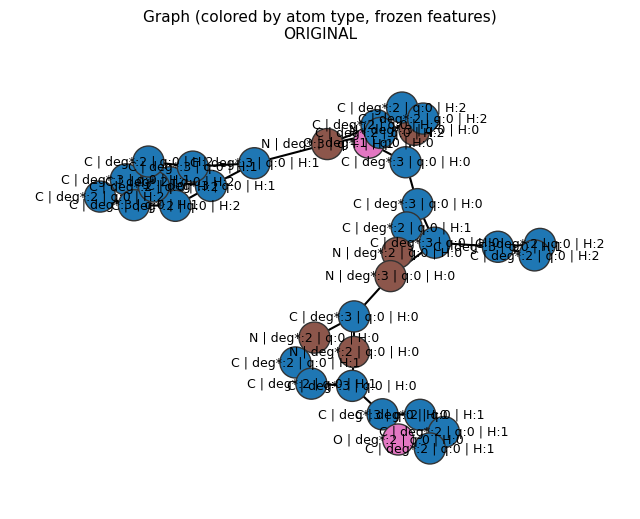

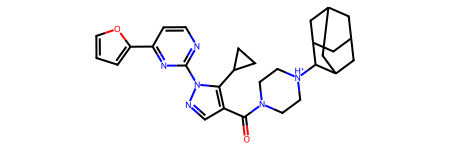

Num Nodes 37
Num Edges 44
Multiset Nodes 37
Decoding a graph with 37 nodes and 44 edges.
[population@iter0] Acc 40.48 at size 42
[population@iter2] Acc: 22.41% at size 406
[population@iter3] Acc: 24.19% at size 62
[population@iter4] Acc: 6.56% at size 61
[population@iter5] Acc: 14.71% at size 68
[population@iter6] Acc: 10.91% at size 55
[population@iter7] Acc: 30.91% at size 55
[population@iter8] Acc: 23.53% at size 85
[population@iter9] Acc: 28.79% at size 66
[population@iter10] Acc: 20.00% at size 55
[population@iter11] Acc: 19.28% at size 83
[population@iter12] Acc: 17.74% at size 62
[population@iter13] Acc: 16.33% at size 49
[population@iter14] Acc: 19.05% at size 63
[population@iter15] Acc: 17.07% at size 41
[population@iter16] Acc: 47.73% at size 88
[population@iter17] Acc: 59.26% at size 81
[population@iter18] Acc: 69.81% at size 106
[population@iter19] Acc: 63.06% at size 111
[population@iter20] Acc: 51.37% at size 146
[population@iter21] Acc: 42.35% at size 170
[population@ite

Num Nodes 37
Num Edges 41
Multiset Nodes 37
Decoding a graph with 37 nodes and 41 edges.
[population@iter0] Acc 72.50 at size 40
[population@iter2] Acc: 58.14% at size 43
[population@iter3] Acc: 33.03% at size 109
[population@iter4] Acc: 33.33% at size 60
[population@iter5] Acc: 23.81% at size 63
[population@iter6] Acc: 37.10% at size 62
[population@iter7] Acc: 40.23% at size 87
[population@iter8] Acc: 59.22% at size 103
[population@iter9] Acc: 68.97% at size 116
[population@iter10] Acc: 65.52% at size 145
[population@iter11] Acc: 50.96% at size 157
[population@iter12] Acc: 54.32% at size 162
[population@iter13] Acc: 42.99% at size 107
[population@iter14] Acc: 30.00% at size 80
[population@iter15] Acc: 37.04% at size 54
[population@iter16] Acc: 22.45% at size 49
[population@iter17] Acc: 28.00% at size 50
[population@iter18] Acc: 14.29% at size 49
[population@iter19] Acc: 28.30% at size 53
[population@iter20] Acc: 20.29% at size 69
[population@iter21] Acc: 35.94% at size 64
[population@

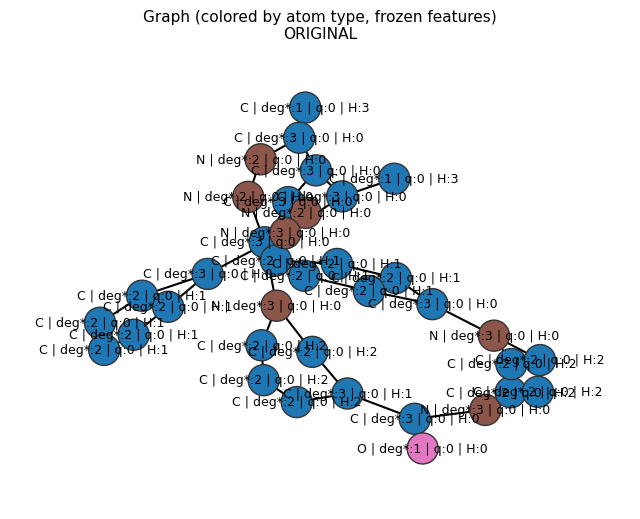

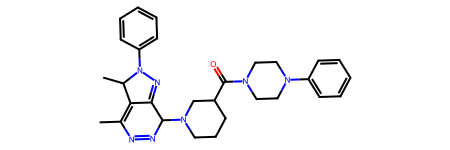

Num Nodes 37
Num Edges 42
Multiset Nodes 37
Decoding a graph with 37 nodes and 42 edges.
[population@iter0] Acc 40.62 at size 32
[population@iter2] Acc: 25.11% at size 231
[population@iter3] Acc: 15.09% at size 53
[population@iter4] Acc: 9.09% at size 55
[population@iter5] Acc: 23.64% at size 55
[population@iter6] Acc: 44.87% at size 78
[population@iter7] Acc: 21.82% at size 55
[population@iter8] Acc: 19.30% at size 57
[population@iter9] Acc: 57.32% at size 82
[population@iter10] Acc: 67.02% at size 94
[population@iter11] Acc: 73.91% at size 92
[population@iter12] Acc: 76.54% at size 81
[population@iter13] Acc: 79.69% at size 128
[population@iter14] Acc: 48.98% at size 49
[population@iter15] Acc: 46.94% at size 49
[population@iter16] Acc: 61.22% at size 49
[population@iter17] Acc: 67.86% at size 56
[population@iter18] Acc: 86.36% at size 88
[population@iter19] Acc: 74.24% at size 66
[population@iter20] Acc: 60.47% at size 43
[population@iter21] Acc: 75.00% at size 48
[population@iter22

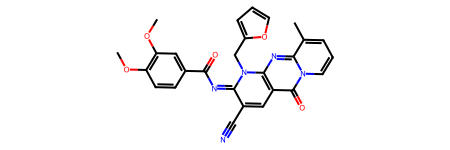

Num Nodes 37
Num Edges 41
Multiset Nodes 37
Decoding a graph with 37 nodes and 41 edges.
[population@iter0] Acc 74.47 at size 47
[population@iter2] Acc: 55.00% at size 60
[population@iter3] Acc: 52.17% at size 69
[population@iter4] Acc: 19.23% at size 52
[population@iter5] Acc: 32.61% at size 46
[population@iter6] Acc: 29.69% at size 64
[population@iter7] Acc: 43.28% at size 67
[population@iter8] Acc: 48.68% at size 76
[population@iter9] Acc: 73.91% at size 69
[population@iter10] Acc: 68.25% at size 63
[population@iter11] Acc: 75.00% at size 80
[population@iter12] Acc: 67.57% at size 74
[population@iter13] Acc: 68.00% at size 50
[population@iter14] Acc: 67.86% at size 56
[population@iter15] Acc: 83.33% at size 48
[population@iter16] Acc: 73.53% at size 68
[population@iter17] Acc: 82.35% at size 68
[population@iter18] Acc: 73.12% at size 93
[population@iter19] Acc: 89.81% at size 108
[population@iter20] Acc: 85.29% at size 102
[population@iter21] Acc: 82.64% at size 144
[population@iter

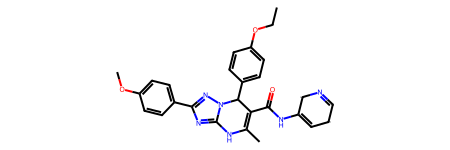

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 73.47 at size 49
[population@iter2] Acc: 59.38% at size 64
[population@iter3] Acc: 41.25% at size 80
[population@iter4] Acc: 40.96% at size 83
[population@iter5] Acc: 40.00% at size 110
[population@iter6] Acc: 29.31% at size 58
[population@iter7] Acc: 44.76% at size 105
[population@iter8] Acc: 55.17% at size 58
[population@iter9] Acc: 74.79% at size 119
[population@iter10] Acc: 67.39% at size 138
[population@iter11] Acc: 79.19% at size 149
[population@iter12] Acc: 87.44% at size 215
[population@iter13] Acc: 72.09% at size 172
[population@iter14] Acc: 87.14% at size 140
[population@iter15] Acc: 83.87% at size 155
[population@iter16] Acc: 85.92% at size 284
[population@iter17] Acc: 91.01% at size 356
[population@iter18] Acc: 83.12% at size 391
[population@iter19] Acc: 80.31% at size 325
[population@iter20] Acc: 52.53% at size 99
[population@iter21] Acc: 47.83% at size 92
[popul

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 70.15 at size 67
[population@iter2] Acc: 61.86% at size 97
[population@iter3] Acc: 53.66% at size 123
[population@iter4] Acc: 39.52% at size 124
[population@iter5] Acc: 48.85% at size 131
[population@iter6] Acc: 44.12% at size 68
[population@iter7] Acc: 72.22% at size 108
[population@iter8] Acc: 62.50% at size 120
[population@iter9] Acc: 81.68% at size 131
[population@iter10] Acc: 85.23% at size 298
[population@iter11] Acc: 78.84% at size 293
[population@iter12] Acc: 75.52% at size 335
[population@iter13] Acc: 90.89% at size 494
[population@iter14] Acc: 77.27% at size 374
[population@iter15] Acc: 82.34% at size 368
[population@iter16] Acc: 86.93% at size 352
[population@iter17] Acc: 87.02% at size 393
[population@iter18] Acc: 78.30% at size 424
[population@iter19] Acc: 87.86% at size 453
[population@iter20] Acc: 89.26% at size 326
[population@iter21] Acc: 82.93% at size 328
[

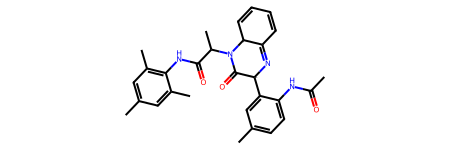

Num Nodes 36
Num Edges 39
Multiset Nodes 36
Decoding a graph with 36 nodes and 39 edges.
[population@iter0] Acc 73.33 at size 30
[population@iter2] Acc: 67.50% at size 40
[population@iter3] Acc: 50.00% at size 112
[population@iter4] Acc: 47.01% at size 117
[population@iter5] Acc: 53.79% at size 132
[population@iter6] Acc: 65.87% at size 126
[population@iter7] Acc: 76.32% at size 114
[population@iter8] Acc: 76.38% at size 127
[population@iter9] Acc: 71.88% at size 128
[population@iter10] Acc: 74.56% at size 114
[population@iter11] Acc: 73.29% at size 146
[population@iter12] Acc: 73.87% at size 111
[population@iter13] Acc: 76.92% at size 104
[population@iter14] Acc: 76.25% at size 80
[population@iter15] Acc: 55.74% at size 61
[population@iter16] Acc: 51.25% at size 80
[population@iter17] Acc: 50.57% at size 87
[population@iter18] Acc: 60.00% at size 105
[population@iter19] Acc: 50.00% at size 86
[population@iter20] Acc: 60.61% at size 66
[population@iter21] Acc: 77.78% at size 108
[popul

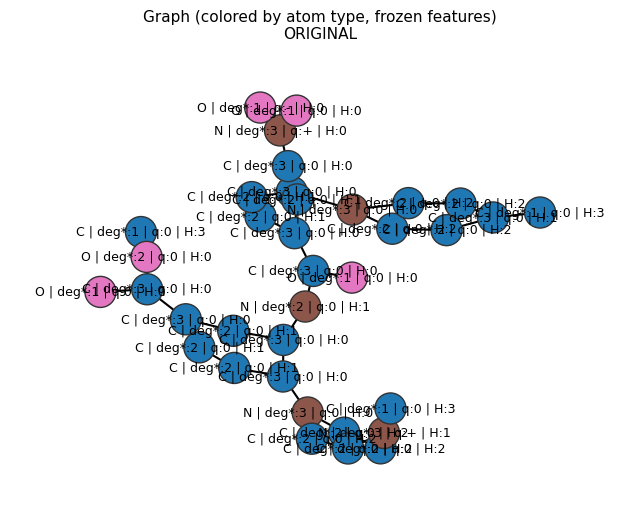

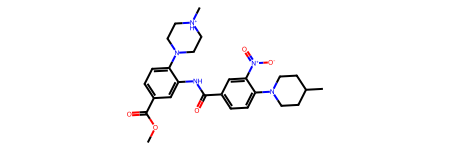

Num Nodes 36
Num Edges 39
Multiset Nodes 36
Decoding a graph with 36 nodes and 39 edges.
[population@iter0] Acc 79.10 at size 67
[population@iter2] Acc: 71.19% at size 59
[population@iter3] Acc: 43.92% at size 148
[population@iter4] Acc: 47.93% at size 121
[population@iter5] Acc: 37.50% at size 72
[population@iter6] Acc: 35.62% at size 73
[population@iter7] Acc: 43.86% at size 114
[population@iter8] Acc: 50.44% at size 113
[population@iter9] Acc: 39.56% at size 91
[population@iter10] Acc: 54.41% at size 136
[population@iter11] Acc: 57.81% at size 128
[population@iter12] Acc: 52.73% at size 110
[population@iter13] Acc: 40.68% at size 59
[population@iter14] Acc: 66.29% at size 89
[population@iter15] Acc: 50.55% at size 91
[population@iter16] Acc: 19.40% at size 67
[population@iter17] Acc: 19.64% at size 56
[population@iter18] Acc: 42.37% at size 59
[population@iter19] Acc: 62.50% at size 80
[population@iter20] Acc: 72.83% at size 92
[population@iter21] Acc: 85.00% at size 120
[population

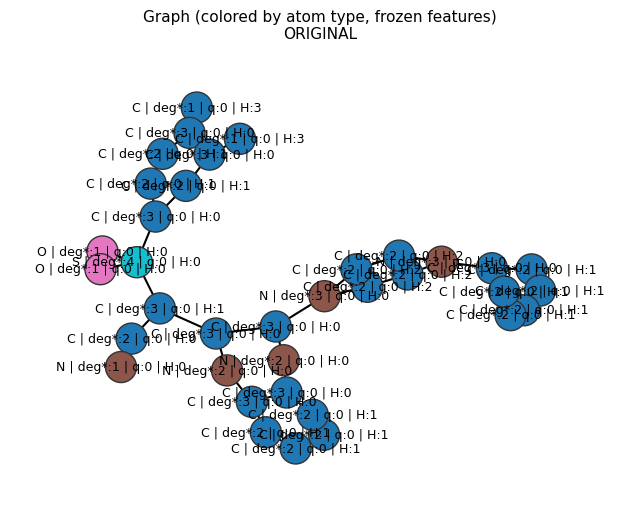

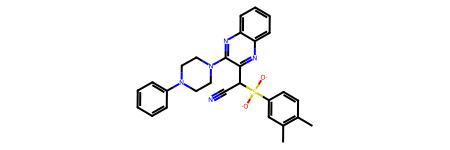

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 73.68 at size 57
[population@iter2] Acc: 42.86% at size 91
[population@iter3] Acc: 35.62% at size 73
[population@iter4] Acc: 28.17% at size 71
[population@iter5] Acc: 21.33% at size 75
[population@iter6] Acc: 21.13% at size 71
[population@iter7] Acc: 40.18% at size 112
[population@iter8] Acc: 36.51% at size 63
[population@iter9] Acc: 42.19% at size 64
[population@iter10] Acc: 42.74% at size 117
[population@iter11] Acc: 61.86% at size 97
[population@iter12] Acc: 40.00% at size 70
[population@iter13] Acc: 54.24% at size 59
[population@iter14] Acc: 44.68% at size 94
[population@iter15] Acc: 62.22% at size 90
[population@iter16] Acc: 68.49% at size 73
[population@iter17] Acc: 57.14% at size 70
[population@iter18] Acc: 53.49% at size 86
[population@iter19] Acc: 67.72% at size 127
[population@iter20] Acc: 84.26% at size 235
[population@iter21] Acc: 88.19% at size 364
[population@it

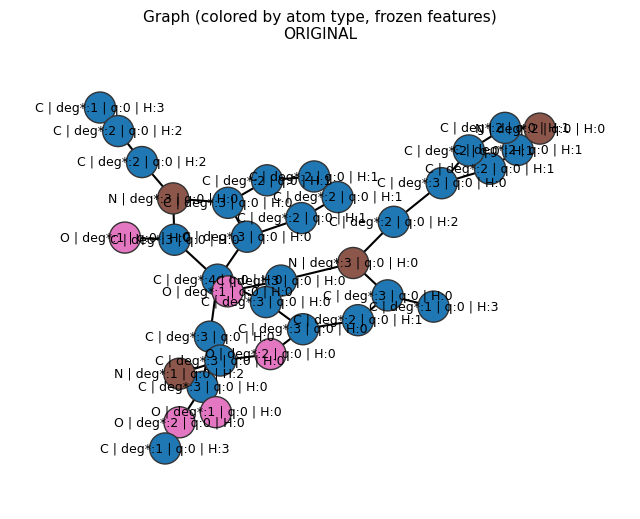

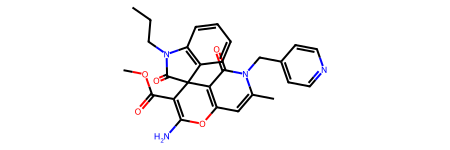

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 34.04 at size 47
[population@iter2] Acc: 28.65% at size 377
[population@iter3] Acc: 36.51% at size 63
[population@iter4] Acc: 18.03% at size 61
[population@iter5] Acc: 11.11% at size 63
[population@iter6] Acc: 28.07% at size 57
[population@iter7] Acc: 28.81% at size 59
[population@iter8] Acc: 22.81% at size 57
[population@iter9] Acc: 43.88% at size 98
[population@iter10] Acc: 16.84% at size 95
[population@iter11] Acc: 42.59% at size 54
[population@iter12] Acc: 30.00% at size 100
[population@iter13] Acc: 14.00% at size 50
[population@iter14] Acc: 12.50% at size 48
[population@iter15] Acc: 33.96% at size 53
[population@iter16] Acc: 38.46% at size 65
[population@iter17] Acc: 49.15% at size 59
[population@iter18] Acc: 48.94% at size 47
[population@iter19] Acc: 49.45% at size 91
[population@iter20] Acc: 33.33% at size 51
[population@iter21] Acc: 22.45% at size 49
[population@iter2

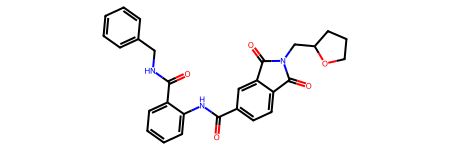

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 68.75 at size 32
[population@iter2] Acc: 63.33% at size 30
[population@iter3] Acc: 43.52% at size 108
[population@iter4] Acc: 46.51% at size 129
[population@iter5] Acc: 48.95% at size 143
[population@iter6] Acc: 84.62% at size 130
[population@iter7] Acc: 75.96% at size 104
[population@iter8] Acc: 54.67% at size 75
[population@iter9] Acc: 46.43% at size 56
[population@iter10] Acc: 70.97% at size 62
[population@iter11] Acc: 84.73% at size 131
[population@iter12] Acc: 82.05% at size 117
[population@iter13] Acc: 88.60% at size 114
[population@iter14] Acc: 81.19% at size 101
[population@iter15] Acc: 85.16% at size 155
[population@iter16] Acc: 85.42% at size 96
[population@iter17] Acc: 77.27% at size 88
[population@iter18] Acc: 76.11% at size 113
[population@iter19] Acc: 82.55% at size 149
[population@iter20] Acc: 82.18% at size 101
[population@iter21] Acc: 83.91% at size 87
[popul

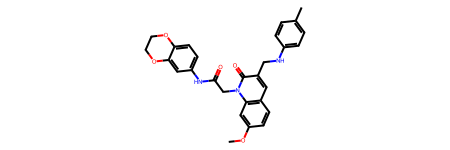

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 68.75 at size 32
[population@iter2] Acc: 87.10% at size 31
[population@iter3] Acc: 64.60% at size 113
[population@iter4] Acc: 59.09% at size 110
[population@iter5] Acc: 49.40% at size 83
[population@iter6] Acc: 48.65% at size 74
[population@iter7] Acc: 60.00% at size 50
[population@iter8] Acc: 48.44% at size 64
[population@iter9] Acc: 64.37% at size 87
[population@iter10] Acc: 73.68% at size 76
[population@iter11] Acc: 80.00% at size 75
[population@iter12] Acc: 83.91% at size 87
[population@iter13] Acc: 89.53% at size 86
[population@iter14] Acc: 87.42% at size 151
[population@iter15] Acc: 80.51% at size 118
[population@iter16] Acc: 77.78% at size 99
[population@iter17] Acc: 79.41% at size 102
[population@iter18] Acc: 77.38% at size 84
[population@iter19] Acc: 74.42% at size 86
[population@iter20] Acc: 73.08% at size 52
[population@iter21] Acc: 83.13% at size 83
[population@it

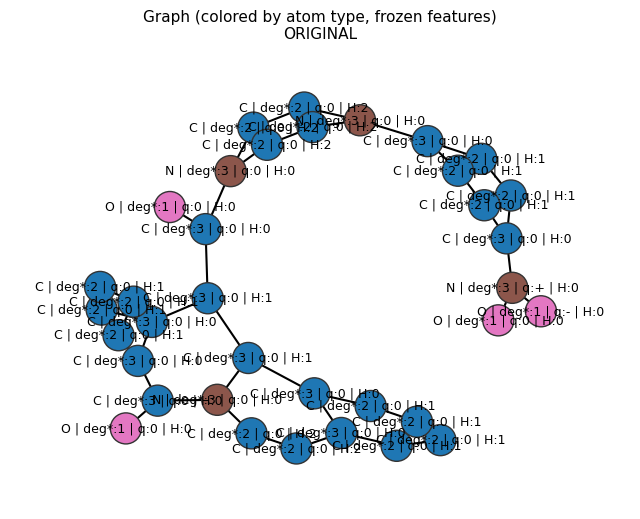

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 68.75 at size 32
[population@iter2] Acc: 70.00% at size 50
[population@iter3] Acc: 44.79% at size 96
[population@iter4] Acc: 36.27% at size 102
[population@iter5] Acc: 35.00% at size 80
[population@iter6] Acc: 50.00% at size 80
[population@iter7] Acc: 65.22% at size 92
[population@iter8] Acc: 65.57% at size 122
[population@iter9] Acc: 60.80% at size 125
[population@iter10] Acc: 76.67% at size 240
[population@iter11] Acc: 81.65% at size 218
[population@iter12] Acc: 66.14% at size 189
[population@iter13] Acc: 72.62% at size 168
[population@iter14] Acc: 73.28% at size 131
[population@iter15] Acc: 87.76% at size 147
[population@iter16] Acc: 90.48% at size 231
[population@iter17] Acc: 92.46% at size 345
[population@iter18] Acc: 84.69% at size 392
[population@iter19] Acc: 84.38% at size 525
[population@iter20] Acc: 86.85% at size 464
[population@iter21] Acc: 86.85% at size 464
[pop

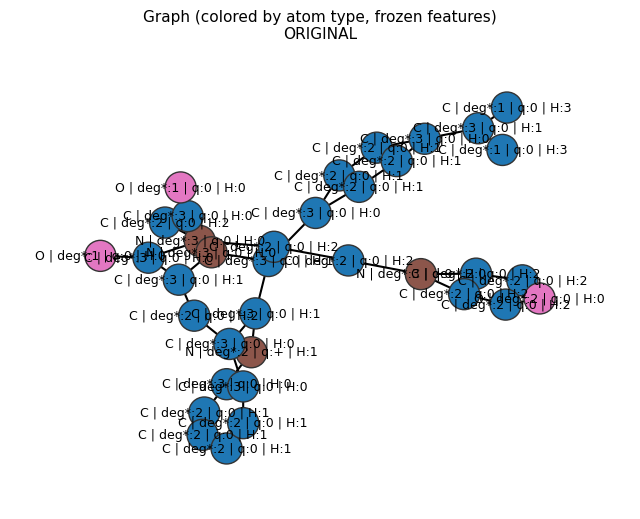

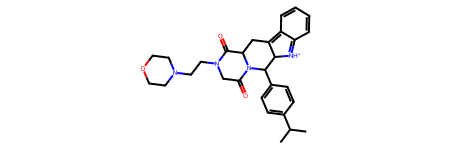

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 60.00 at size 40
[population@iter2] Acc: 52.11% at size 71
[population@iter3] Acc: 31.15% at size 61
[population@iter4] Acc: 35.06% at size 77
[population@iter5] Acc: 22.64% at size 53
[population@iter6] Acc: 31.48% at size 54
[population@iter7] Acc: 44.00% at size 100
[population@iter8] Acc: 77.59% at size 116
[population@iter9] Acc: 65.60% at size 125
[population@iter10] Acc: 80.56% at size 108
[population@iter11] Acc: 73.68% at size 133
[population@iter12] Acc: 63.41% at size 164
[population@iter13] Acc: 68.66% at size 217
[population@iter14] Acc: 87.58% at size 322
[population@iter15] Acc: 92.70% at size 356
[population@iter16] Acc: 89.53% at size 344
[population@iter17] Acc: 91.99% at size 287
[population@iter18] Acc: 89.51% at size 286
[population@iter19] Acc: 90.79% at size 228
[population@iter20] Acc: 90.56% at size 233
[population@iter21] Acc: 92.52% at size 294
[pop

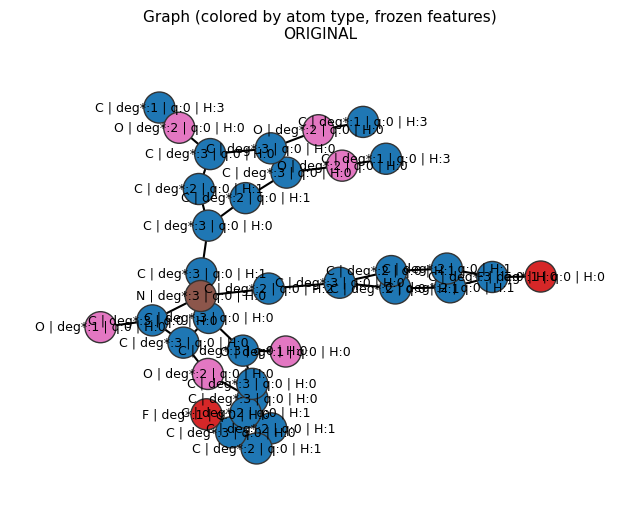

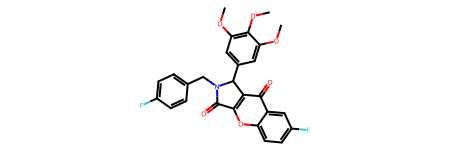

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 66.67 at size 36
[population@iter2] Acc: 47.62% at size 63
[population@iter3] Acc: 27.27% at size 55
[population@iter4] Acc: 22.67% at size 75
[population@iter5] Acc: 17.11% at size 76
[population@iter6] Acc: 18.00% at size 50
[population@iter7] Acc: 43.37% at size 83
[population@iter8] Acc: 34.69% at size 49
[population@iter9] Acc: 43.37% at size 83
[population@iter10] Acc: 53.25% at size 77
[population@iter11] Acc: 39.66% at size 58
[population@iter12] Acc: 7.50% at size 40
[population@iter13] Acc: 23.68% at size 38
[population@iter14] Acc: 20.37% at size 54
[population@iter15] Acc: 33.33% at size 42
[population@iter16] Acc: 20.00% at size 35
[population@iter17] Acc: 23.53% at size 34
[population@iter18] Acc: 27.78% at size 36
[population@iter19] Acc: 42.86% at size 28
[population@iter20] Acc: 65.22% at size 23
[population@iter21] Acc: 61.54% at size 26
[population@iter22] 

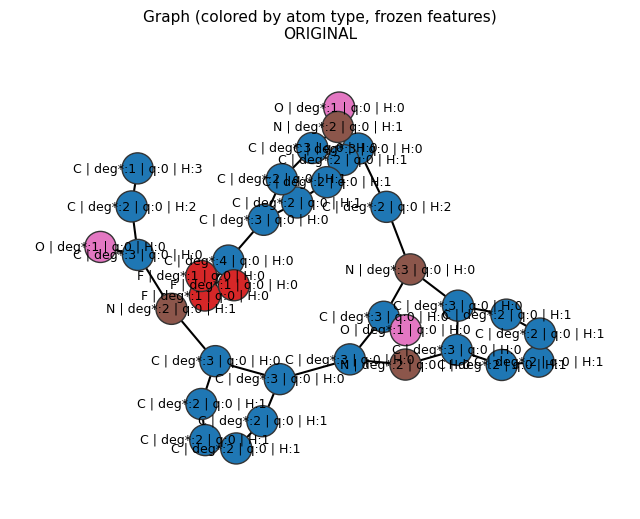

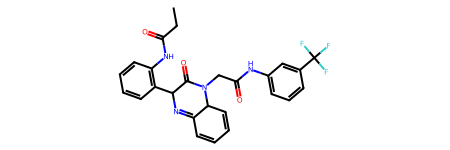

Num Nodes 36
Num Edges 39
Multiset Nodes 36
Decoding a graph with 36 nodes and 39 edges.
[population@iter0] Acc 71.74 at size 46
[population@iter2] Acc: 62.90% at size 124
[population@iter3] Acc: 41.49% at size 94
[population@iter4] Acc: 34.69% at size 98
[population@iter5] Acc: 22.83% at size 92
[population@iter6] Acc: 57.14% at size 77
[population@iter7] Acc: 31.40% at size 86
[population@iter8] Acc: 33.33% at size 51
[population@iter9] Acc: 46.58% at size 73
[population@iter10] Acc: 49.45% at size 91
[population@iter11] Acc: 67.89% at size 109
[population@iter12] Acc: 67.68% at size 99
[population@iter13] Acc: 75.63% at size 119
[population@iter14] Acc: 78.68% at size 197
[population@iter15] Acc: 86.62% at size 284
[population@iter16] Acc: 86.34% at size 183
[population@iter17] Acc: 91.12% at size 169
[population@iter18] Acc: 84.55% at size 110
[population@iter19] Acc: 76.62% at size 77
[population@iter20] Acc: 78.85% at size 104
[population@iter21] Acc: 80.17% at size 121
[populati

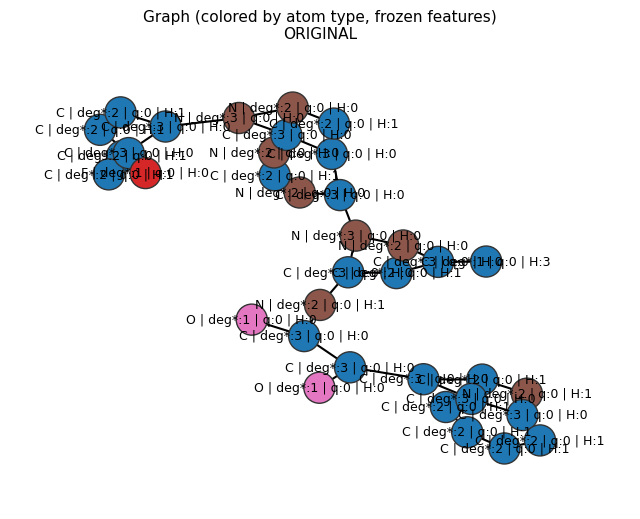

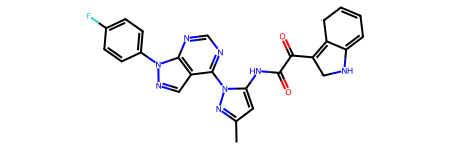

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 73.33 at size 30
[population@iter2] Acc: 68.52% at size 54
[population@iter3] Acc: 47.00% at size 100
[population@iter4] Acc: 36.26% at size 91
[population@iter5] Acc: 44.83% at size 87
[population@iter6] Acc: 30.77% at size 65
[population@iter7] Acc: 59.09% at size 66
[population@iter8] Acc: 33.33% at size 81
[population@iter9] Acc: 59.74% at size 77
[population@iter10] Acc: 71.19% at size 59
[population@iter11] Acc: 77.97% at size 59
[population@iter12] Acc: 82.80% at size 93
[population@iter13] Acc: 86.60% at size 97
[population@iter14] Acc: 82.81% at size 128
[population@iter15] Acc: 66.03% at size 156
[population@iter16] Acc: 54.90% at size 153
[population@iter17] Acc: 83.78% at size 111
[population@iter18] Acc: 80.18% at size 111
[population@iter19] Acc: 68.42% at size 95
[population@iter20] Acc: 51.75% at size 114
[population@iter21] Acc: 66.20% at size 71
[population@

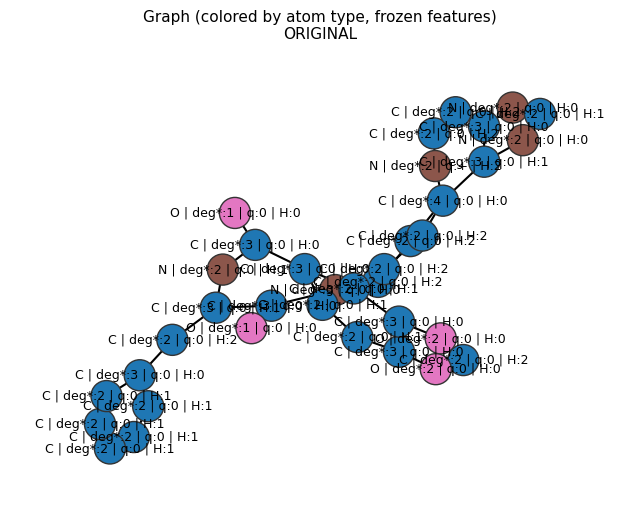

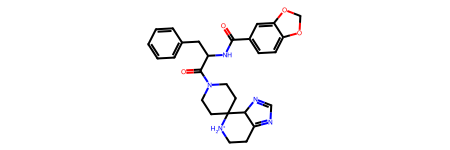

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 68.85 at size 61
[population@iter2] Acc: 69.23% at size 26
[population@iter3] Acc: 51.15% at size 174
[population@iter4] Acc: 47.55% at size 204
[population@iter5] Acc: 55.34% at size 206
[population@iter6] Acc: 59.34% at size 182
[population@iter7] Acc: 57.05% at size 156
[population@iter8] Acc: 51.35% at size 148
[population@iter9] Acc: 74.31% at size 144
[population@iter10] Acc: 72.83% at size 173
[population@iter11] Acc: 52.42% at size 124
[population@iter12] Acc: 77.98% at size 218
[population@iter13] Acc: 77.60% at size 250
[population@iter14] Acc: 91.08% at size 325
[population@iter15] Acc: 87.63% at size 299
[population@iter16] Acc: 86.05% at size 294
[population@iter17] Acc: 87.50% at size 304
[population@iter18] Acc: 87.23% at size 282
[population@iter19] Acc: 88.97% at size 390
[population@iter20] Acc: 89.24% at size 595
[population@iter21] Acc: 93.39% at size 514


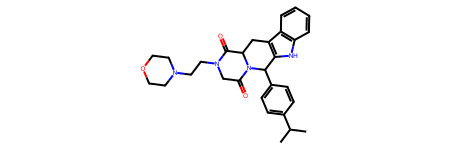

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 67.50 at size 40
[population@iter2] Acc: 48.72% at size 117
[population@iter3] Acc: 35.48% at size 62
[population@iter4] Acc: 23.33% at size 60
[population@iter5] Acc: 56.96% at size 79
[population@iter6] Acc: 31.48% at size 54
[population@iter7] Acc: 25.49% at size 51
[population@iter8] Acc: 27.78% at size 54
[population@iter9] Acc: 50.00% at size 58
[population@iter10] Acc: 46.00% at size 50
[population@iter11] Acc: 60.98% at size 82
[population@iter12] Acc: 71.59% at size 88
[population@iter13] Acc: 82.26% at size 124
[population@iter14] Acc: 87.86% at size 140
[population@iter15] Acc: 71.60% at size 169
[population@iter16] Acc: 78.04% at size 214
[population@iter17] Acc: 79.29% at size 169
[population@iter18] Acc: 77.11% at size 201
[population@iter19] Acc: 86.27% at size 255
[population@iter20] Acc: 88.04% at size 301
[population@iter21] Acc: 94.22% at size 329
[populati

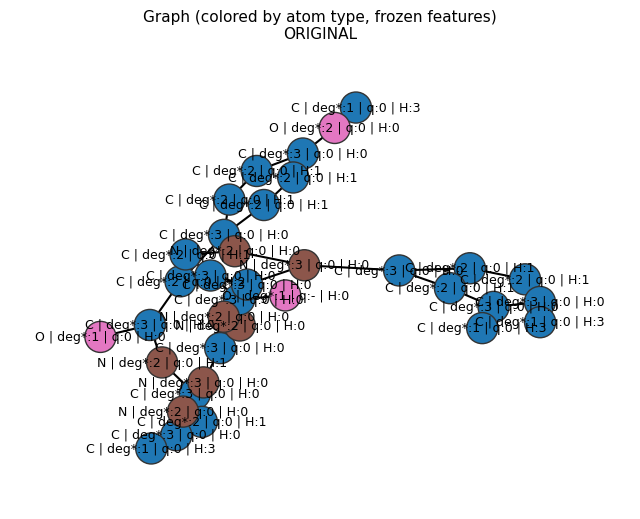

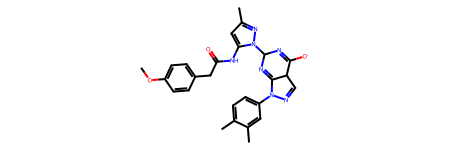

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 73.91 at size 46
[population@iter2] Acc: 65.38% at size 52
[population@iter3] Acc: 50.00% at size 82
[population@iter4] Acc: 32.89% at size 76
[population@iter5] Acc: 50.65% at size 77
[population@iter6] Acc: 65.17% at size 89
[population@iter7] Acc: 50.00% at size 66
[population@iter8] Acc: 54.76% at size 42
[population@iter9] Acc: 72.34% at size 47
[population@iter10] Acc: 83.67% at size 98
[population@iter11] Acc: 85.37% at size 41
[population@iter12] Acc: 88.24% at size 34
[population@iter13] Acc: 64.29% at size 28
[population@iter14] Acc: 72.55% at size 51
[population@iter15] Acc: 50.98% at size 51
[population@iter16] Acc: 83.12% at size 77
[population@iter17] Acc: 65.41% at size 133
[population@iter18] Acc: 74.64% at size 138
[population@iter19] Acc: 59.46% at size 111
[population@iter20] Acc: 73.96% at size 96
[population@iter21] Acc: 86.61% at size 112
[population@ite

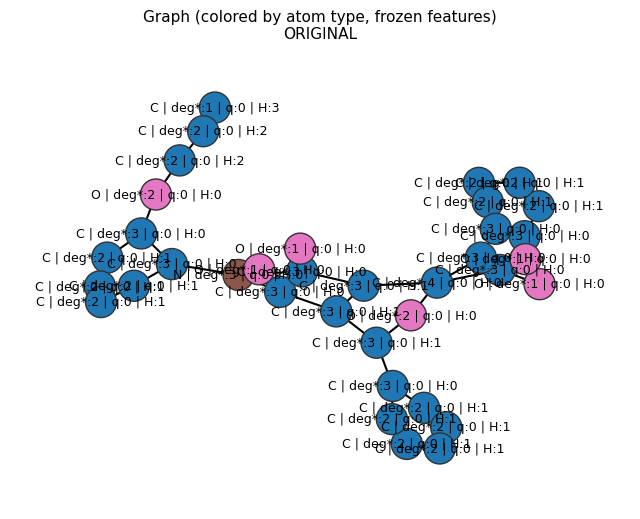

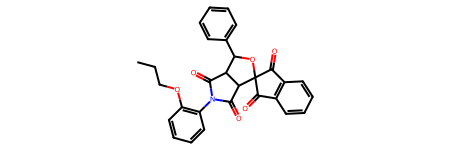

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 57.50 at size 40
[population@iter2] Acc: 53.85% at size 65
[population@iter3] Acc: 29.31% at size 58
[population@iter4] Acc: 14.81% at size 54
[population@iter5] Acc: 20.00% at size 50
[population@iter6] Acc: 38.55% at size 83
[population@iter7] Acc: 38.36% at size 73
[population@iter8] Acc: 41.33% at size 75
[population@iter9] Acc: 52.87% at size 87
[population@iter10] Acc: 81.76% at size 148
[population@iter11] Acc: 79.48% at size 229
[population@iter12] Acc: 81.27% at size 251
[population@iter13] Acc: 81.52% at size 211
[population@iter14] Acc: 81.85% at size 248
[population@iter15] Acc: 71.19% at size 177
[population@iter16] Acc: 87.31% at size 331
[population@iter17] Acc: 71.94% at size 253
[population@iter18] Acc: 69.23% at size 325
[population@iter19] Acc: 40.91% at size 110
[population@iter20] Acc: 26.09% at size 69
[population@iter21] Acc: 30.86% at size 81
[populati

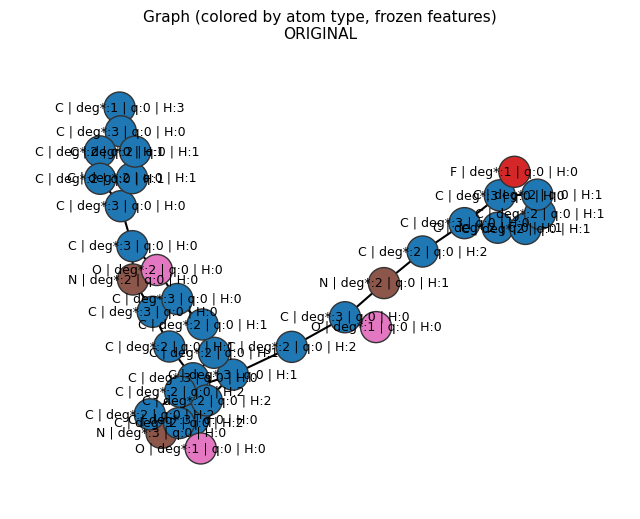

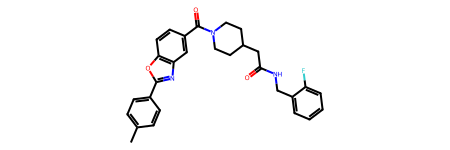

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 70.91 at size 55
[population@iter2] Acc: 65.67% at size 67
[population@iter3] Acc: 41.76% at size 91
[population@iter4] Acc: 34.74% at size 95
[population@iter5] Acc: 24.76% at size 105
[population@iter6] Acc: 30.19% at size 53
[population@iter7] Acc: 33.33% at size 54
[population@iter8] Acc: 50.00% at size 54
[population@iter9] Acc: 52.83% at size 106
[population@iter10] Acc: 83.57% at size 140
[population@iter11] Acc: 85.91% at size 149
[population@iter12] Acc: 88.15% at size 135
[population@iter13] Acc: 92.96% at size 142
[population@iter14] Acc: 94.57% at size 184
[population@iter15] Acc: 91.67% at size 132
[population@iter16] Acc: 93.68% at size 95
[population@iter17] Acc: 93.40% at size 106
[population@iter18] Acc: 97.56% at size 164
[population@iter19] Acc: 100.00% at size 95
0
[]
No Graphs encoded ...!
[33] Original Graph


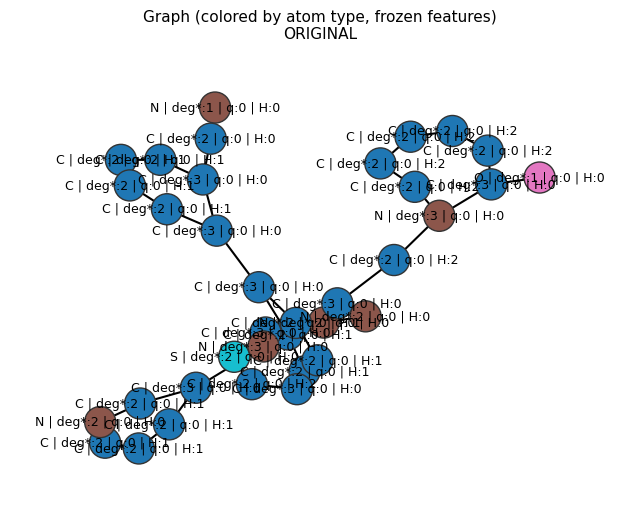

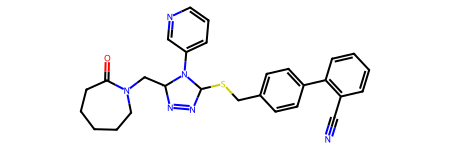

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 70.00 at size 40
[population@iter2] Acc: 60.00% at size 25
[population@iter3] Acc: 44.00% at size 75
[population@iter4] Acc: 31.15% at size 61
[population@iter5] Acc: 35.42% at size 48
[population@iter6] Acc: 31.91% at size 47
[population@iter7] Acc: 37.25% at size 51
[population@iter8] Acc: 27.66% at size 47
[population@iter9] Acc: 33.33% at size 45
[population@iter10] Acc: 10.87% at size 46
[population@iter11] Acc: 24.44% at size 45
[population@iter12] Acc: 22.22% at size 45
[population@iter13] Acc: 4.88% at size 41
[population@iter14] Acc: 10.26% at size 39
[population@iter15] Acc: 35.71% at size 42
[population@iter16] Acc: 34.62% at size 52
[population@iter17] Acc: 50.00% at size 42
[population@iter18] Acc: 48.57% at size 70
[population@iter19] Acc: 80.37% at size 107
[population@iter20] Acc: 84.95% at size 93
[population@iter21] Acc: 82.50% at size 80
[population@iter22]

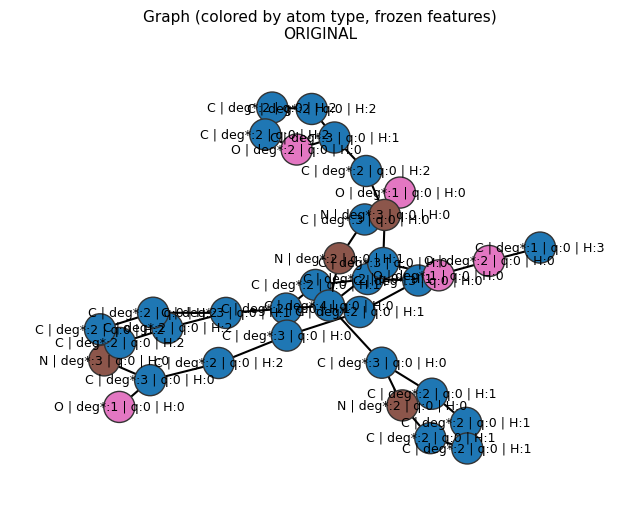

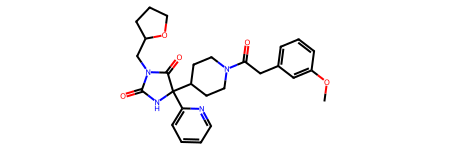

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 70.00 at size 60
[population@iter2] Acc: 56.73% at size 171
[population@iter3] Acc: 41.89% at size 74
[population@iter4] Acc: 39.44% at size 71
[population@iter5] Acc: 33.33% at size 105
[population@iter6] Acc: 59.02% at size 122
[population@iter7] Acc: 58.49% at size 106
[population@iter8] Acc: 58.91% at size 202
[population@iter9] Acc: 75.19% at size 258
[population@iter10] Acc: 68.86% at size 350
[population@iter11] Acc: 73.57% at size 314
[population@iter12] Acc: 58.15% at size 227
[population@iter13] Acc: 51.44% at size 313
[population@iter14] Acc: 63.41% at size 205
[population@iter15] Acc: 71.14% at size 201
[population@iter16] Acc: 68.87% at size 106
[population@iter17] Acc: 72.27% at size 119
[population@iter18] Acc: 73.79% at size 145
[population@iter19] Acc: 72.73% at size 88
[population@iter20] Acc: 72.07% at size 111
[population@iter21] Acc: 78.95% at size 133
[p

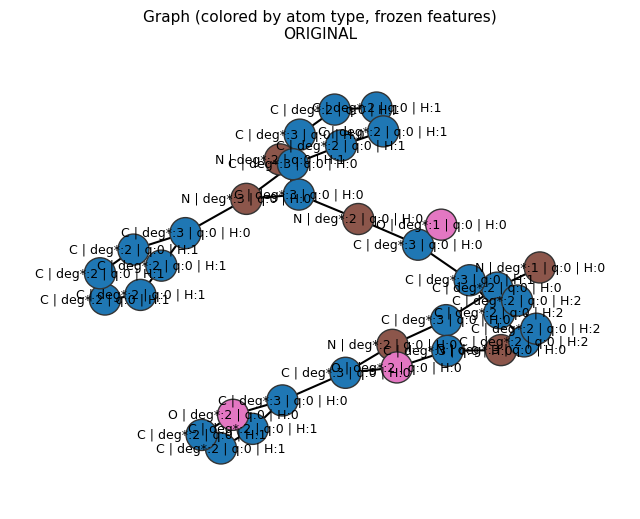

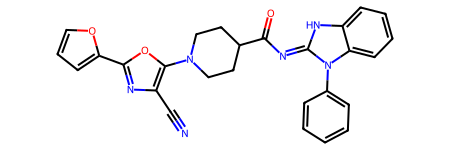

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 70.00 at size 60
[population@iter2] Acc: 56.31% at size 428
[population@iter3] Acc: 41.54% at size 65
[population@iter4] Acc: 37.50% at size 64
[population@iter5] Acc: 27.69% at size 65
[population@iter6] Acc: 38.10% at size 63
[population@iter7] Acc: 4.76% at size 63
[population@iter8] Acc: 19.05% at size 63
[population@iter9] Acc: 20.63% at size 63
[population@iter10] Acc: 26.67% at size 60
[population@iter11] Acc: 57.83% at size 83
[population@iter12] Acc: 33.33% at size 54
[population@iter13] Acc: 33.33% at size 51
[population@iter14] Acc: 29.17% at size 48
[population@iter15] Acc: 56.63% at size 83
[population@iter16] Acc: 28.33% at size 60
[population@iter17] Acc: 74.00% at size 50
[population@iter18] Acc: 82.54% at size 63
[population@iter19] Acc: 94.00% at size 100
[population@iter20] Acc: 96.18% at size 131
[population@iter21] Acc: 100.00% at size 94
0
[]
No Graphs e

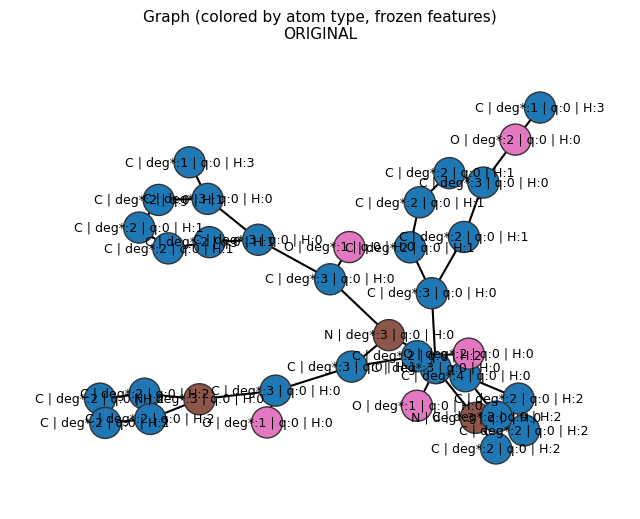

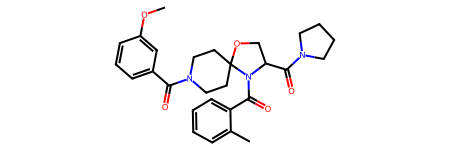

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 57.50 at size 40
[population@iter2] Acc: 50.72% at size 69
[population@iter3] Acc: 41.94% at size 62
[population@iter4] Acc: 23.44% at size 64
[population@iter5] Acc: 51.40% at size 107
[population@iter6] Acc: 43.02% at size 86
[population@iter7] Acc: 68.18% at size 110
[population@iter8] Acc: 87.72% at size 171
[population@iter9] Acc: 80.35% at size 229
[population@iter10] Acc: 88.84% at size 251
[population@iter11] Acc: 85.37% at size 287
[population@iter12] Acc: 88.47% at size 295
[population@iter13] Acc: 92.33% at size 313
[population@iter14] Acc: 88.06% at size 444
[population@iter15] Acc: 93.63% at size 565
[population@iter16] Acc: 79.57% at size 328
[population@iter17] Acc: 88.77% at size 383
[population@iter18] Acc: 78.54% at size 410
[population@iter19] Acc: 84.64% at size 319
[population@iter20] Acc: 85.63% at size 355
[population@iter21] Acc: 86.23% at size 276
[po

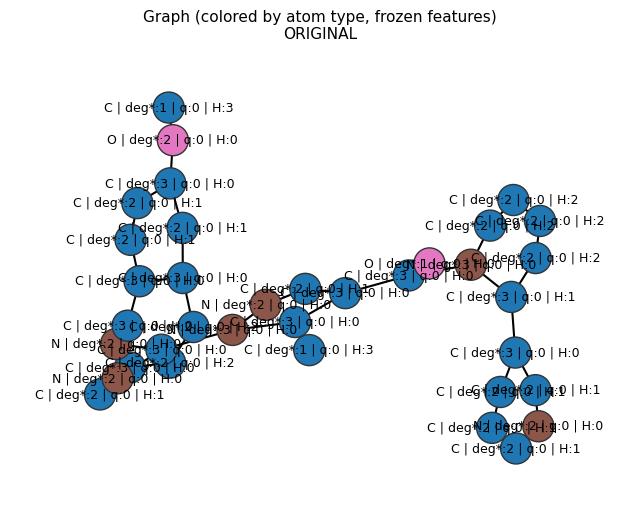

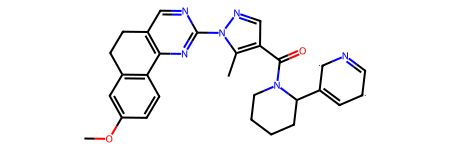

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 82.50 at size 40
[population@iter2] Acc: 64.17% at size 240
[population@iter3] Acc: 18.64% at size 59
[population@iter4] Acc: 32.20% at size 59
[population@iter5] Acc: 16.36% at size 55
[population@iter6] Acc: 23.33% at size 60
[population@iter7] Acc: 38.33% at size 60
[population@iter8] Acc: 23.73% at size 59
[population@iter9] Acc: 5.26% at size 57
[population@iter10] Acc: 22.03% at size 59
[population@iter11] Acc: 27.42% at size 62
[population@iter12] Acc: 3.51% at size 57
[population@iter13] Acc: 15.79% at size 57
[population@iter14] Acc: 14.04% at size 57
[population@iter15] Acc: 4.08% at size 49
[population@iter16] Acc: 4.44% at size 45
[population@iter17] Acc: 15.91% at size 44
[population@iter18] Acc: 35.19% at size 54
[population@iter19] Acc: 52.56% at size 78
[population@iter20] Acc: 84.25% at size 127
[population@iter21] Acc: 83.02% at size 159
[population@iter22] 

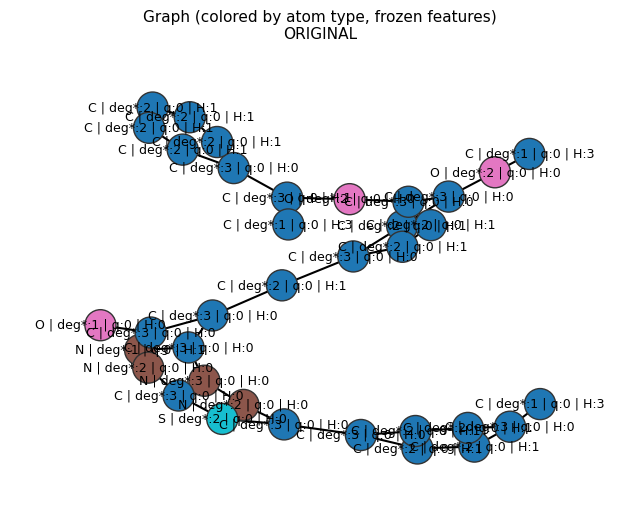

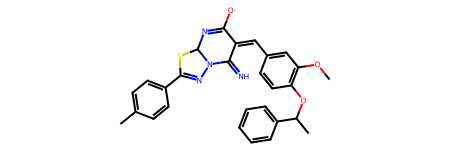

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 78.26 at size 46
[population@iter2] Acc: 59.57% at size 47
[population@iter3] Acc: 43.48% at size 115
[population@iter4] Acc: 36.67% at size 60
[population@iter5] Acc: 52.59% at size 116
[population@iter6] Acc: 36.71% at size 79
[population@iter7] Acc: 64.10% at size 78
[population@iter8] Acc: 34.15% at size 82
[population@iter9] Acc: 60.24% at size 83
[population@iter10] Acc: 70.79% at size 89
[population@iter11] Acc: 75.20% at size 125
[population@iter12] Acc: 89.40% at size 151
[population@iter13] Acc: 80.95% at size 105
[population@iter14] Acc: 82.76% at size 116
[population@iter15] Acc: 96.88% at size 128
[population@iter16] Acc: 80.00% at size 50
[population@iter17] Acc: 86.43% at size 140
[population@iter18] Acc: 85.79% at size 190
[population@iter19] Acc: 79.41% at size 170
[population@iter20] Acc: 78.03% at size 173
[population@iter21] Acc: 70.72% at size 181
[popula

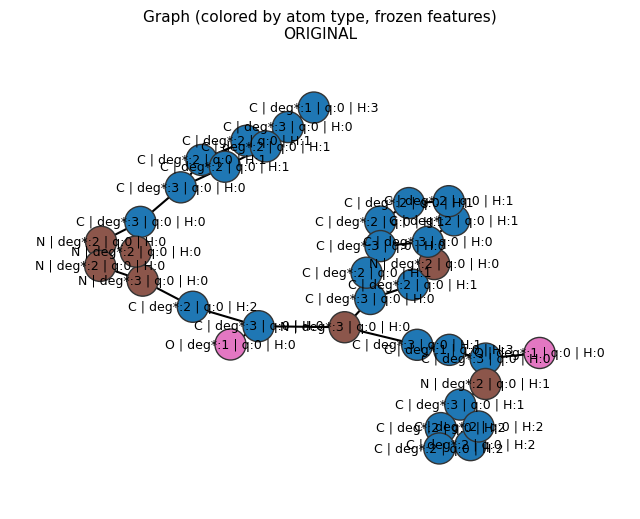

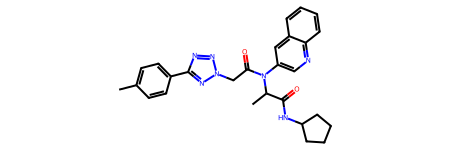

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 58.54 at size 41
[population@iter2] Acc: 68.52% at size 54
[population@iter3] Acc: 45.13% at size 113
[population@iter4] Acc: 39.78% at size 93
[population@iter5] Acc: 52.50% at size 80
[population@iter6] Acc: 13.33% at size 60
[population@iter7] Acc: 33.33% at size 60
[population@iter8] Acc: 33.85% at size 65
[population@iter9] Acc: 13.33% at size 60
[population@iter10] Acc: 23.73% at size 59
[population@iter11] Acc: 22.58% at size 62
[population@iter12] Acc: 5.17% at size 58
[population@iter13] Acc: 13.73% at size 51
[population@iter14] Acc: 20.00% at size 50
[population@iter15] Acc: 24.00% at size 50
[population@iter16] Acc: 85.58% at size 104
[population@iter17] Acc: 82.91% at size 158
[population@iter18] Acc: 76.34% at size 131
[population@iter19] Acc: 72.08% at size 154
[population@iter20] Acc: 77.27% at size 110
[population@iter21] Acc: 87.31% at size 134
[population@i

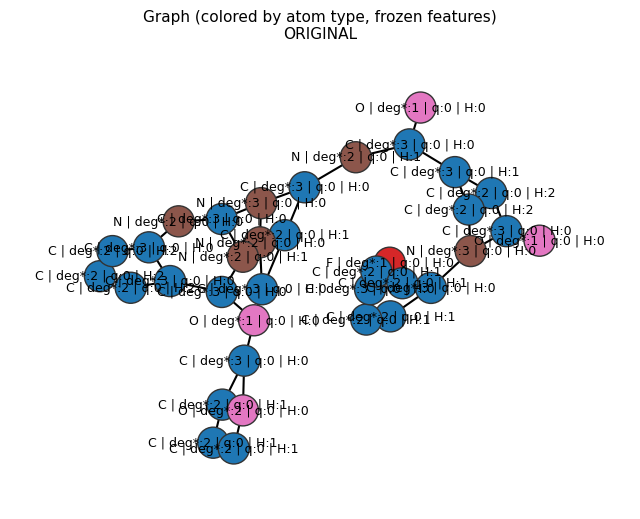

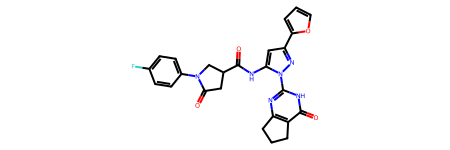

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 74.00 at size 50
[population@iter2] Acc: 87.10% at size 31
[population@iter3] Acc: 52.80% at size 161
[population@iter4] Acc: 51.43% at size 140
[population@iter5] Acc: 70.71% at size 140
[population@iter6] Acc: 78.24% at size 170
[population@iter7] Acc: 77.31% at size 260
[population@iter8] Acc: 57.29% at size 96
[population@iter9] Acc: 85.33% at size 259
[population@iter10] Acc: 89.24% at size 251
[population@iter11] Acc: 87.94% at size 141
[population@iter12] Acc: 82.18% at size 202
[population@iter13] Acc: 89.10% at size 413
[population@iter14] Acc: 85.15% at size 303
[population@iter15] Acc: 87.24% at size 243
[population@iter16] Acc: 84.15% at size 265
[population@iter17] Acc: 85.84% at size 226
[population@iter18] Acc: 83.94% at size 218
[population@iter19] Acc: 81.88% at size 138
[population@iter20] Acc: 77.95% at size 127
[population@iter21] Acc: 89.27% at size 205
[

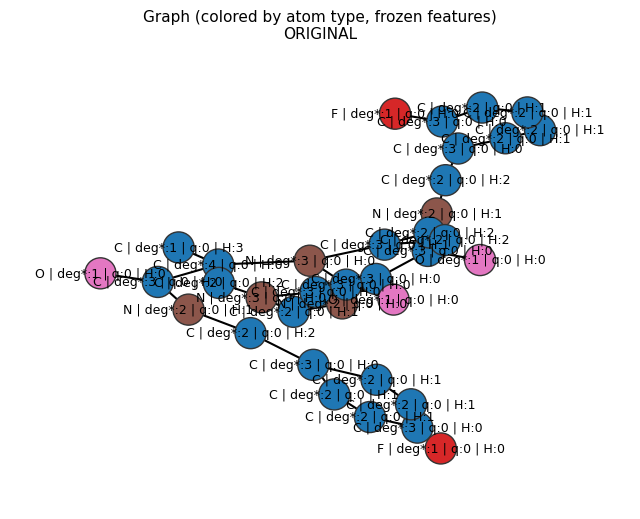

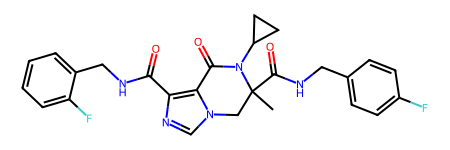

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 73.68 at size 57
[population@iter2] Acc: 58.89% at size 377
[population@iter3] Acc: 25.00% at size 72
[population@iter4] Acc: 28.26% at size 92
[population@iter5] Acc: 38.61% at size 101
[population@iter6] Acc: 66.04% at size 106
[population@iter7] Acc: 47.75% at size 111
[population@iter8] Acc: 59.21% at size 76
[population@iter9] Acc: 70.91% at size 110
[population@iter10] Acc: 75.73% at size 103
[population@iter11] Acc: 88.89% at size 117
[population@iter12] Acc: 81.38% at size 145
[population@iter13] Acc: 85.80% at size 176
[population@iter14] Acc: 73.41% at size 173
[population@iter15] Acc: 64.00% at size 100
[population@iter16] Acc: 68.29% at size 82
[population@iter17] Acc: 74.71% at size 87
[population@iter18] Acc: 97.27% at size 110
[population@iter19] Acc: 93.65% at size 63
[population@iter20] Acc: 89.89% at size 89
[population@iter21] Acc: 94.38% at size 178
[popul

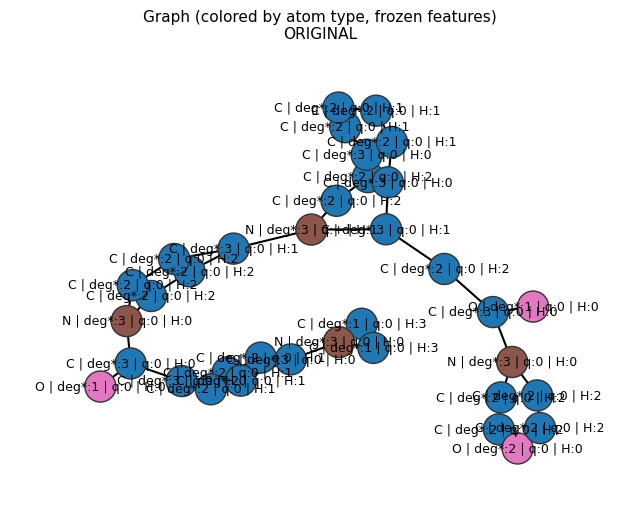

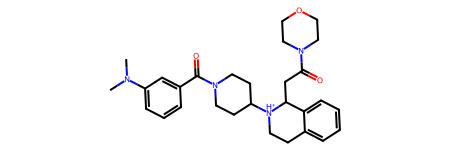

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 62.50 at size 40
[population@iter2] Acc: 59.26% at size 81
[population@iter3] Acc: 33.87% at size 62
[population@iter4] Acc: 28.12% at size 64
[population@iter5] Acc: 49.53% at size 107
[population@iter6] Acc: 50.00% at size 90
[population@iter7] Acc: 46.24% at size 93
[population@iter8] Acc: 38.10% at size 63
[population@iter9] Acc: 50.70% at size 71
[population@iter10] Acc: 57.30% at size 89
[population@iter11] Acc: 64.15% at size 106
[population@iter12] Acc: 81.51% at size 119
[population@iter13] Acc: 76.70% at size 176
[population@iter14] Acc: 82.22% at size 135
[population@iter15] Acc: 87.17% at size 265
[population@iter16] Acc: 87.64% at size 445
[population@iter17] Acc: 93.68% at size 427
[population@iter18] Acc: 92.81% at size 570
[population@iter19] Acc: 96.13% at size 698
[population@iter20] Acc: 97.10% at size 861
[population@iter21] Acc: 96.72% at size 1005
[popul

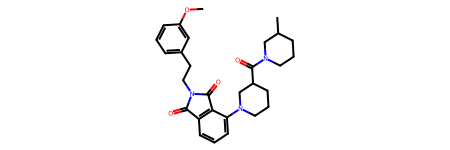

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 50.00 at size 32
[population@iter2] Acc: 49.35% at size 231
[population@iter3] Acc: 11.54% at size 52
[population@iter4] Acc: 19.61% at size 51
[population@iter5] Acc: 24.07% at size 54
[population@iter6] Acc: 45.76% at size 59
[population@iter7] Acc: 61.04% at size 77
[population@iter8] Acc: 49.37% at size 79
[population@iter9] Acc: 68.18% at size 88
[population@iter10] Acc: 66.67% at size 69
[population@iter11] Acc: 77.78% at size 72
[population@iter12] Acc: 80.95% at size 105
[population@iter13] Acc: 71.29% at size 101
[population@iter14] Acc: 49.40% at size 83
[population@iter15] Acc: 65.04% at size 123
[population@iter16] Acc: 72.37% at size 152
[population@iter17] Acc: 75.78% at size 161
[population@iter18] Acc: 78.08% at size 146
[population@iter19] Acc: 76.71% at size 219
[population@iter20] Acc: 80.33% at size 239
[population@iter21] Acc: 75.00% at size 232
[populati

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 64.71 at size 34
[population@iter2] Acc: 58.82% at size 51
[population@iter3] Acc: 50.00% at size 58
[population@iter4] Acc: 28.99% at size 69
[population@iter5] Acc: 25.00% at size 60
[population@iter6] Acc: 5.17% at size 58
[population@iter7] Acc: 10.34% at size 58
[population@iter8] Acc: 13.79% at size 58
[population@iter9] Acc: 11.67% at size 60
[population@iter10] Acc: 51.69% at size 89
[population@iter11] Acc: 28.57% at size 56
[population@iter12] Acc: 31.48% at size 54
[population@iter13] Acc: 17.31% at size 52
[population@iter14] Acc: 27.45% at size 51
[population@iter15] Acc: 9.09% at size 44
[population@iter16] Acc: 7.14% at size 42
[population@iter17] Acc: 36.07% at size 61
[population@iter18] Acc: 48.28% at size 58
[population@iter19] Acc: 64.71% at size 68
[population@iter20] Acc: 82.07% at size 145
[population@iter21] Acc: 87.92% at size 240
[population@iter22] 

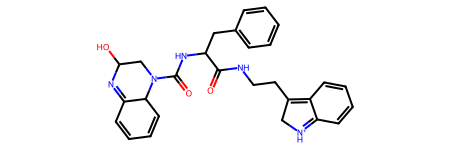

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 79.17 at size 48
[population@iter2] Acc: 57.03% at size 256
[population@iter3] Acc: 33.59% at size 131
[population@iter4] Acc: 18.75% at size 112
[population@iter5] Acc: 27.42% at size 62
[population@iter6] Acc: 33.33% at size 60
[population@iter7] Acc: 20.00% at size 60
[population@iter8] Acc: 37.90% at size 124
[population@iter9] Acc: 50.00% at size 116
[population@iter10] Acc: 2.74% at size 73
[population@iter11] Acc: 1.92% at size 52
[population@iter12] Acc: 11.32% at size 53
[population@iter13] Acc: 9.80% at size 51
[population@iter14] Acc: 8.51% at size 47
[population@iter15] Acc: 23.91% at size 46
[population@iter16] Acc: 37.50% at size 48
[population@iter17] Acc: 25.58% at size 43
[population@iter18] Acc: 46.51% at size 43
[population@iter19] Acc: 53.33% at size 45
[population@iter20] Acc: 87.93% at size 58
[population@iter21] Acc: 89.19% at size 74
[population@iter22

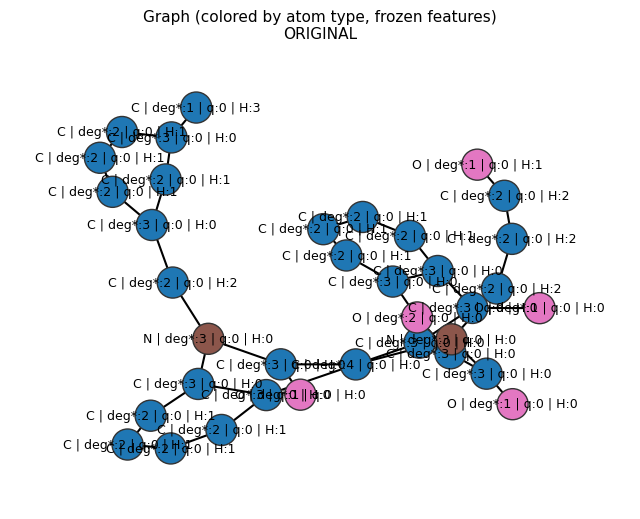

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 48.65 at size 37
[population@iter2] Acc: 51.44% at size 243
[population@iter3] Acc: 13.21% at size 53
[population@iter4] Acc: 20.75% at size 53
[population@iter5] Acc: 16.00% at size 50
[population@iter6] Acc: 42.86% at size 84
[population@iter7] Acc: 35.96% at size 89
[population@iter8] Acc: 49.32% at size 73
[population@iter9] Acc: 48.87% at size 133
[population@iter10] Acc: 27.14% at size 70
[population@iter11] Acc: 45.95% at size 37
[population@iter12] Acc: 17.14% at size 35
[population@iter13] Acc: 16.95% at size 59
[population@iter14] Acc: 49.21% at size 63
[population@iter15] Acc: 44.83% at size 29
[population@iter16] Acc: 31.71% at size 41
[population@iter17] Acc: 48.00% at size 50
[population@iter18] Acc: 63.81% at size 105
[population@iter19] Acc: 71.57% at size 102
[population@iter20] Acc: 65.15% at size 132
[population@iter21] Acc: 42.96% at size 135
[population@i

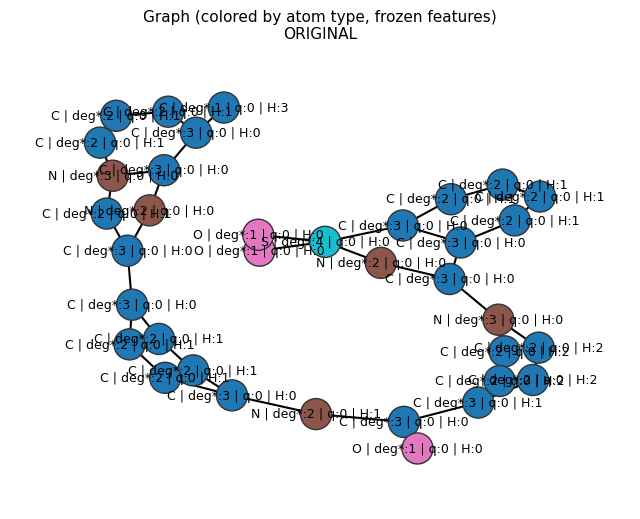

Num Nodes 36
Num Edges 41
Multiset Nodes 36
Decoding a graph with 36 nodes and 41 edges.
[population@iter0] Acc 73.47 at size 49
[population@iter2] Acc: 56.92% at size 130
[population@iter3] Acc: 35.56% at size 90
[population@iter4] Acc: 34.58% at size 107
[population@iter5] Acc: 37.37% at size 99
[population@iter6] Acc: 76.24% at size 101
[population@iter7] Acc: 49.51% at size 103
[population@iter8] Acc: 60.55% at size 109
[population@iter9] Acc: 53.61% at size 97
[population@iter10] Acc: 69.90% at size 103
[population@iter11] Acc: 81.30% at size 123
[population@iter12] Acc: 86.08% at size 158
[population@iter13] Acc: 85.45% at size 268
[population@iter14] Acc: 89.68% at size 155
[population@iter15] Acc: 90.58% at size 191
[population@iter16] Acc: 88.84% at size 224
[population@iter17] Acc: 88.27% at size 196
[population@iter18] Acc: 84.27% at size 248
[population@iter19] Acc: 87.45% at size 255
[population@iter20] Acc: 84.36% at size 211
[population@iter21] Acc: 88.44% at size 173
[p

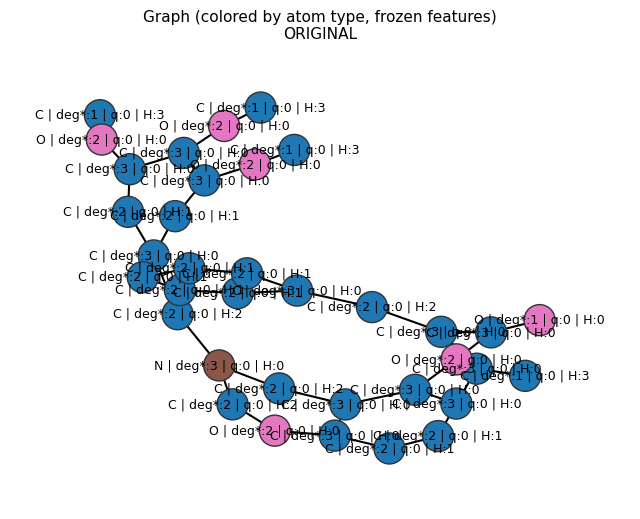

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 45.83 at size 24
[population@iter2] Acc: 43.80% at size 137
[population@iter3] Acc: 23.26% at size 43
[population@iter4] Acc: 33.33% at size 45
[population@iter5] Acc: 10.87% at size 46
[population@iter6] Acc: 7.69% at size 52
[population@iter7] Acc: 15.22% at size 46
[population@iter8] Acc: 32.69% at size 52
[population@iter9] Acc: 15.91% at size 44
[population@iter10] Acc: 10.64% at size 47
[population@iter11] Acc: 15.22% at size 46
[population@iter12] Acc: 25.58% at size 43
[population@iter13] Acc: 22.22% at size 45
[population@iter14] Acc: 8.89% at size 45
[population@iter15] Acc: 24.49% at size 49
[population@iter16] Acc: 2.44% at size 41
[population@iter17] Acc: 5.13% at size 39
[population@iter18] Acc: 6.06% at size 33
[population@iter19] Acc: 41.03% at size 39
[population@iter20] Acc: 27.78% at size 36
[population@iter21] Acc: 33.33% at size 27
[population@iter22] Acc

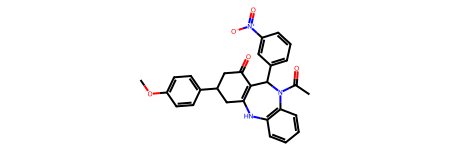

Num Nodes 36
Num Edges 40
Multiset Nodes 36
Decoding a graph with 36 nodes and 40 edges.
[population@iter0] Acc 73.21 at size 56
[population@iter2] Acc: 50.86% at size 175
[population@iter3] Acc: 30.14% at size 73
[population@iter4] Acc: 25.00% at size 68
[population@iter5] Acc: 35.56% at size 90
[population@iter6] Acc: 14.52% at size 62
[population@iter7] Acc: 41.18% at size 85
[population@iter8] Acc: 30.65% at size 62
[population@iter9] Acc: 48.72% at size 78
[population@iter10] Acc: 47.47% at size 99
[population@iter11] Acc: 55.68% at size 88
[population@iter12] Acc: 71.90% at size 121
[population@iter13] Acc: 54.65% at size 86
[population@iter14] Acc: 40.00% at size 55
[population@iter15] Acc: 56.67% at size 60
[population@iter16] Acc: 48.57% at size 70
[population@iter17] Acc: 59.55% at size 89
[population@iter18] Acc: 23.26% at size 43
[population@iter19] Acc: 25.64% at size 39
[population@iter20] Acc: 12.82% at size 39
[population@iter21] Acc: 40.00% at size 35
[population@iter2

In [8]:
from src.encoding.decoder import greedy_oracle_decoder
from src.utils import visualisations

from pathlib import Path
from src.encoding.oracles import MLPClassifier, Oracle
from pprint import pprint
from src.utils.utils import DataTransformer
from torchhd import HRRTensor


# Real Oracle
def is_final_graph(G_small: nx.Graph, G_big: nx.Graph) -> bool:
    """NetworkX VF2: is `G_small` an induced, label-preserving subgraph of `G_big`?"""
    if G_small.number_of_nodes() == G_big.number_of_nodes() and G_small.number_of_edges() == G_big.number_of_edges():
        nm = lambda a, b: a["feat"] == b["feat"]
        GM = nx.algorithms.isomorphism.GraphMatcher(G_big, G_small, node_match=nm)
        return GM.subgraph_is_isomorphic()
    return False


start = 0
end = 50
batch_size = end - start
zinc_smiles = sorted(ZincSmiles(split="valid"), key=lambda d: -d.num_nodes)[start:end]
# batch_size = len(zinc_smiles)
# batch_size = 1
dataloader = DataLoader(dataset=zinc_smiles, batch_size=batch_size, shuffle=False)

# Classifier
chkpt = torch.load("/Users/akaveh/projects/kit/graph_hdc/_models/mlp_best_laynorm_deep.pt", map_location="cpu", weights_only=False)

cfg = chkpt["config"]
# print(f"Classifier's best metric (AUC): {chkpt['best_metric']}")
print(f"Classifier's cfg")
pprint(cfg, indent=4)

classifier = MLPClassifier(
    hv_dim=cfg.get("hv_dim"),
    hidden_dims=cfg.get("hidden_dims"),
    use_layer_norm=cfg.get("use_layer_norm"),
    use_batch_norm=cfg.get("use_batch_norm")).to(device).eval()
classifier.load_state_dict(chkpt["model_state"], strict=True)
oracle = Oracle(model=classifier, model_type="mlp")
oracle.encoder = hypernet

y = []
correct_decoded = []
for i, batch in enumerate(dataloader):
    # Encode the whole graph in one HV
    encoded_data = hypernet.forward(batch)
    node_term = encoded_data["node_terms"]
    graph_term = encoded_data["graph_embedding"]

    graph_terms_hd = graph_term.as_subclass(HRRTensor)

    ground_truth_counters = {}
    datas = batch.to_data_list()
    for j, g in enumerate(range(batch_size)):
        print("================================================")
        full_graph_nx = DataTransformer.pyg_to_nx(data=datas[g])
        print(f"[{j}] Original Graph")
        visualisations.draw_nx_with_atom_colorings(full_graph_nx, label="ORIGINAL")
        plt.show()
        mol_full, _ = DataTransformer.nx_to_mol(full_graph_nx)
        display(mol_full)

        print(f"Num Nodes {datas[g].num_nodes}")
        print(f"Num Edges {int(datas[g].num_edges / 2)}")
        node_multiset = DataTransformer.get_node_counter_from_batch(batch=g, data=batch)
        print(f"Multiset Nodes {node_multiset.total()}")
        nx_GS: list[nx.Graph] = greedy_oracle_decoder(
            node_multiset=node_multiset,
            oracle=oracle,
            full_g_h=graph_terms_hd[g],
            beam_size=8,
            oracle_threshold=0.5,
            strict=True,
            full_g_nx=DataTransformer.pyg_to_nx(data=datas[g]),
            draw=False,
            use_pair_feasibility=False,
            expand_on_n_anchors=4,
            use_perfect_oracle=False,
        )
        print(len(nx_GS))
        print(nx_GS)
        nx_GS = list(filter(None, nx_GS))
        if len(nx_GS) == 0:
            y.append(0)
            print("No Graphs encoded ...!")
            continue

        sub_g_ys = [0]
        for i, g in enumerate(nx_GS):
            print(f"Graph Nr: {i}")
            visualisations.draw_nx_with_atom_colorings(g, label="DECODED")
            plt.show()

            mol, _ = DataTransformer.nx_to_mol(g)
            display(mol)
            print(f"Num Atoms {mol.GetNumAtoms()}")
            print(f"Num Bonds {mol.GetNumBonds()}")

            is_final = is_final_graph(g, full_graph_nx)
            print("Is final graph: ", is_final)
            sub_g_ys.append(int(is_final))
        is_final_graph_ = int(sum(sub_g_ys) >= 1)
        y.append(is_final_graph_)
        if is_final_graph_:
            correct_decoded.append(j)
        sub_g_ys = []

print(f"Accuracy: {sum(y) / len(y)}")
print(len(y))
print(correct_decoded)